<a href="https://colab.research.google.com/github/paolominguzzi/FFX/blob/main/FFX_FOODX_MKT_AI_Agents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install stable-baselines3[extra]
!pip install gym
!pip install torch
!pip install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl.metadata (558 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.8 MB/s eta 0:00:00
Using cached Farama_Notifications-0.0.4-py3-none-any.whl (2.5 kB)
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446661 sha256=c399c01da06902400a5f403cfaa7a1f054d41a721570264b19971489ad1d7759
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license


In [2]:
!pip install pandas openpyxl

In [3]:
import pandas as pd

In [4]:
# Step 2: Uploading the documents
from google.colab import files
uploaded = files.upload()

Saving series-históricas-de-frutas-y-hortalizas_mensual_Tomate_optimized.xlsx to series-históricas-de-frutas-y-hortalizas_mensual_Tomate_optimized.xlsx


In [5]:
# Step 3: Loading the data
# Assuming that the uploaded files are in Excel format
data_files = {}
for filename in uploaded.keys():
    data_files[filename] = pd.read_excel(filename)

In [6]:
# Example: Display the first few rows of one of the uploaded files
for key in data_files:
    print(f"Displaying data from {key}:")
    print(data_files[key].head())

Displaying data from series-históricas-de-frutas-y-hortalizas_mensual_Tomate_optimized.xlsx:
     Fecha                              Mercado Variedad / Tipo  Calidad  \
0  07/2021     Agrícola del Norte S.A. de Arica      Larga vida  Primera   
1  07/2021     Agrícola del Norte S.A. de Arica      Larga vida  Segunda   
2  07/2021     Agrícola del Norte S.A. de Arica      Larga vida  Tercera   
3  07/2021  Comercializadora del Agro de Limarí      Larga vida  Primera   
4  07/2021  Comercializadora del Agro de Limarí      Larga vida  Segunda   

                    Procedencia  Volumen  Precio mínimo  Precio máximo  \
0  Región de Arica y Parinacota     7955    2668.046695    4802.484127   
1  Región de Arica y Parinacota     9280    2134.437305    4268.874738   
2  Región de Arica y Parinacota     8700    1600.828042    3735.265348   
3           Provincia de Limarí    10000    9604.968255   13873.842992   
4           Provincia de Limarí     7400    7470.530822   11739.405560   

   P

In [8]:
# Visualizar los primeros datos
# Choose the key for the file you want to display
key_to_display = list(data_files.keys())[0]  # Selecting the first file, adjust as needed
df = data_files[key_to_display]
print(df.head())

     Fecha                              Mercado Variedad / Tipo  Calidad  \
0  07/2021     Agrícola del Norte S.A. de Arica      Larga vida  Primera   
1  07/2021     Agrícola del Norte S.A. de Arica      Larga vida  Segunda   
2  07/2021     Agrícola del Norte S.A. de Arica      Larga vida  Tercera   
3  07/2021  Comercializadora del Agro de Limarí      Larga vida  Primera   
4  07/2021  Comercializadora del Agro de Limarí      Larga vida  Segunda   

                    Procedencia  Volumen  Precio mínimo  Precio máximo  \
0  Región de Arica y Parinacota     7955    2668.046695    4802.484127   
1  Región de Arica y Parinacota     9280    2134.437305    4268.874738   
2  Región de Arica y Parinacota     8700    1600.828042    3735.265348   
3           Provincia de Limarí    10000    9604.968255   13873.842992   
4           Provincia de Limarí     7400    7470.530822   11739.405560   

   Precio promedio Unidad de comercialización  
0      3881.161065            $/caja 10 kilos  
1 

In [16]:
# Preprocesamiento de los datos
# Verificar el nombre correcto de la columna de volumen
print(df.columns)  # Imprime las columnas disponibles en tu DataFrame

# Ajusta el nombre de la columna según sea necesario
volumen_column = 'Volumen'  # Reemplaza 'Volumen' con el nombre real de tu columna de volumen
precio_column = 'Precio promedio'  # Reemplaza 'Precio Promedio' con el nombre real de tu columna de precio

# Check if the column exists before proceeding
if precio_column in df.columns:
    df['volumen_normalizado'] = df[volumen_column] / df[volumen_column].max()
    df['precio_normalizado'] = df[precio_column] / df[precio_column].max()

    # Usar solo las columnas necesarias
    data = df[['volumen_normalizado', 'precio_normalizado']].values # Remove the parenthesis after .values
else:
    print(f"Error: Column '{precio_column}' not found in the DataFrame.")

Index(['Fecha', 'Mercado', 'Variedad / Tipo', 'Calidad', 'Procedencia',
       'Volumen', 'Precio mínimo', 'Precio máximo', 'Precio promedio',
       'Unidad de comercialización', 'volumen_normalizado',
       'precio_normalizado'],
      dtype='object')


In [18]:
!pip install stable-baselines3[extra]
!pip install gym
!pip install torch
!pip install numpy

In [20]:
import gym
from gym import spaces
import numpy as np

In [23]:
class InventoryEnvFromData(gym.Env):
    def __init__(self, data):
        super(InventoryEnvFromData, self).__init__()
        self.data = data
        self.current_step = 0
        self.max_steps = len(data)

        # Definir espacio de acción y observación
        self.action_space = spaces.Discrete(2)  # Reabastecer o no reabastecer
        self.observation_space = spaces.Box(low=0, high=1, shape=(2,), dtype=np.float32)

    def reset(self):
        self.current_step = 0
        return self.data[self.current_step]

    def step(self, action):
        volumen, precio = self.data[self.current_step]
        reward = 0

        # Simular la acción
        if action == 1:  # Reabastecer
            reward = 1 - precio  # Suponiendo que se penaliza por el costo

        self.current_step += 1
        done = self.current_step >= self.max_steps

        # La siguiente observación es el siguiente estado de datos
        obs = self.data[self.current_step] if not done else np.array([0, 0])
        return obs, reward, done, {}

    def render(self, mode='human'):
        print(f'Step: {self.current_step}, Volumen: {self.data[self.current_step][0]}, Precio: {self.data[self.current_step][1]}')


In [25]:
#Paso 3: Entrenamiento de los Modelos de DRL Usando Datos Históricos
#Entrenar el modelo DQN:
import gym
from gym import spaces
import numpy as np
from stable_baselines3 import DQN # Import the DQN class

env = InventoryEnvFromData(data)
dqn_model = DQN("MlpPolicy", env, verbose=1)
dqn_model.learn(total_timesteps=10000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [27]:
#Entrenar el modelo A2C:
from stable_baselines3 import A2C  # Import the A2C class
a2c_model = A2C("MlpPolicy", env, verbose=1)
a2c_model.learn(total_timesteps=10000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| time/                 |          |
|    fps                | 494      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.229   |
|    explained_variance | -0.223   |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -0.0198  |
|    value_loss         | 0.866    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 511      |
|    iterations         | 200      |
|    time_elapsed       | 1        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.05    |
|    explained_variance | -0.023   |
|    learning_rate      | 0.0007   |
|    n_updates    

In [28]:
#Entrenar el modelo DDPG para entornos continuos:
#Modificar el entorno para que acepte acciones continuas:
class ContinuousInventoryEnvFromData(InventoryEnvFromData):
    def __init__(self, data):
        super().__init__(data)
        self.action_space = spaces.Box(low=-1, high=1, shape=(1,), dtype=np.float32)

    def step(self, action):
        volumen, precio = self.data[self.current_step]
        action = int(action[0] * 10)
        reward = -abs(volumen - action)  # Recompensa basada en la proximidad al volumen necesario
        self.current_step += 1
        done = self.current_step >= self.max_steps
        obs = self.data[self.current_step] if not done else np.array([0, 0])
        return obs, reward, done, {}


In [30]:
#Entrenar el modelo DDPG:
!pip install stable-baselines3
from stable_baselines3 import DDPG  # Import the DDPG class
env = ContinuousInventoryEnvFromData(data)
ddpg_model = DDPG("MlpPolicy", env, verbose=1)
ddpg_model.learn(total_timesteps=10000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [32]:
#Entrenar el modelo PPO:
!pip install stable-baselines3
from stable_baselines3 import PPO  # Import the PPO class
env = ContinuousInventoryEnvFromData(data) # Assuming 'data' is defined and accessible
ppo_model = PPO("MlpPolicy", env, verbose=1)
ppo_model.learn(total_timesteps=10000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


-----------------------------
| time/              |      |
|    fps             | 1296 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 898          |
|    iterations           | 2            |
|    time_elapsed         | 4            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0028892625 |
|    clip_fraction        | 0.0107       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.39        |
|    explained_variance   | 0.000555     |
|    learning_rate        | 0.0003       |
|    loss                 | 4.27e+03     |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.00886     |
|    std                  | 0.947        |
|    value_loss           | 9.61e+03     |
----------------

In [39]:
#Entrenar el modelo DDPG para entornos continuos:
#Modificar el entorno para que acepte acciones continuas:
class ContinuousInventoryEnvFromData(InventoryEnvFromData):
    def __init__(self, data):
        super().__init__(data)
        self.action_space = spaces.Box(low=-1, high=1, shape=(1,), dtype=np.float32)

    def step(self, action):
        volumen, precio = self.data[self.current_step]
        # Handle the case where action is a scalar
        if not isinstance(action, np.ndarray):
            action = np.array([action])  # Convert to a NumPy array
        action = int(action[0] * 10) # Now you can index the array
        reward = -abs(volumen - action)  # Recompensa basada en la proximidad al volumen necesario
        self.current_step += 1
        done = self.current_step >= self.max_steps
        obs = self.data[self.current_step] if not done else np.array([0, 0])
        return obs, reward, done, {}

In [41]:
#Entrenar el modelo DDPG para entornos continuos:
#Modificar el entorno para que acepte acciones continuas:
class ContinuousInventoryEnvFromData(InventoryEnvFromData):
    def __init__(self, data):
        super().__init__(data)
        self.action_space = spaces.Box(low=-1, high=1, shape=(1,), dtype=np.float32)

    def step(self, action):
        volumen, precio = self.data[self.current_step]
        # Handle the case where action is a scalar
        if not isinstance(action, np.ndarray):
            action = np.array([action])  # Convert to a NumPy array
        action = int(action[0] * 10) # Now you can index the array
        reward = -abs(volumen - action)  # Recompensa basada en la proximidad al volumen necesario
        self.current_step += 1
        done = self.current_step >= self.max_steps
        obs = self.data[self.current_step] if not done else np.array([0, 0])
        return obs, reward, done, {}

In [43]:
#Entrenar el modelo DDPG para entornos continuos:
#Modificar el entorno para que acepte acciones continuas:
class ContinuousInventoryEnvFromData(InventoryEnvFromData):
    def __init__(self, data):
        super().__init__(data)
        self.action_space = spaces.Box(low=-1, high=1, shape=(1,), dtype=np.float32)

    def step(self, action):
        volumen, precio = self.data[self.current_step]
        # Handle the case where action is a scalar by converting it to a single-element array
        if not isinstance(action, np.ndarray):
            action = np.array([action])
        # Scale and convert the action to an integer
        action = int(action[0] * 10)  # Now you can index the array
        reward = -abs(volumen - action)  # Recompensa basada en la proximidad al volumen necesario
        self.current_step += 1
        done = self.current_step >= self.max_steps
        obs = self.data[self.current_step] if not done else np.array([0, 0])
        return obs, reward, done, {}

In [47]:
def evaluate_model(model, env, n_episodes=100):
    all_rewards = []
    for episode in range(n_episodes):
        obs = env.reset()
        total_rewards = 0
        while True:
            action, _ = model.predict(obs, deterministic=True) # Get action from the model
            # Handle the case where action is a scalar by converting it to a single-element array if needed
            if not isinstance(action, np.ndarray):
                action = np.array([action])
            action = int(action[0] * 10)  # Now you can safely index the array
            obs, reward, done, _ = env.step(action)
            total_rewards += reward
            if done:
                break
        all_rewards.append(total_rewards)
    return np.mean(all_rewards), np.std(all_rewards)

In [49]:
def evaluate_model(model, env, n_episodes=100):
    all_rewards = []
    for episode in range(n_episodes):
        obs = env.reset()
        total_rewards = 0
        while True:
            action, _ = model.predict(obs, deterministic=True) # Get action from the model
            # Ensure action is a NumPy array and handle the case of a single value output
            if not isinstance(action, np.ndarray):
                action = np.array([action])
            # If the model outputs a single value, it will be the only element in the array
            action = int(action[0] * 10)
            obs, reward, done, _ = env.step(action)
            total_rewards += reward
            if done:
                break
        all_rewards.append(total_rewards)
    return np.mean(all_rewards), np.std(all_rewards)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
#Paso 5: Guardar y Compartir los Resultados
#Guardar los modelos entrenados:

#Puedes guardar los modelos entrenados en Google Drive para usarlos posteriormente:
dqn_model.save("/content/dqn_inventory_model")
a2c_model.save("/content/a2c_inventory_model")
ddpg_model.save("/content/ddpg_inventory_model")
ppo_model.save("/content/ppo_inventory_model")

In [53]:
!pip install matplotlib


In [62]:
def evaluate_model(model, env, n_episodes=100):
    all_rewards = []
    for episode in range(n_episodes):
        obs = env.reset()
        total_rewards = 0
        while True:
            action, _ = model.predict(obs, deterministic=True) # Get action from the model
            # Ensure action is a NumPy array, even if it's a single value
            action = np.asarray(action).flatten()  # Flatten to handle both scalar and array outputs
            obs, reward, done, _ = env.step(action)
            total_rewards += reward
            if done:
                break
        all_rewards.append(total_rewards)
    return np.mean(all_rewards), np.std(all_rewards)

In [59]:
# In the 'step' method of your 'ContinuousInventoryEnvFromData' class:
def step(self, action):
    volumen, precio = self.data[self.current_step]
    # action = int(action[0] * 10)  # Remove this line - action is already an integer
    reward = -abs(volumen - action)  # Recompensa basada en la proximidad al volumen necesario
    self.current_step += 1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
mean_reward_dqn, std_reward_dqn = evaluate_model(dqn_model, env)
mean_reward_a2c, std_reward_a2c = evaluate_model(a2c_model, env)
mean_reward_ddpg, std_reward_ddpg = evaluate_model(ddpg_model, env)
mean_reward_ppo, std_reward_ppo = evaluate_model(ppo_model, env)


In [146]:
#Paso 5: Guardar y Compartir los Resultados
#Guardar los modelos entrenados:

#Puedes guardar los modelos entrenados en Google Drive para usarlos posteriormente:
dqn_model.save("/content/dqn_inventory_model")
a2c_model.save("/content/a2c_inventory_model")
ddpg_model.save("/content/ddpg_inventory_model")
ppo_model.save("/content/ppo_inventory_model")

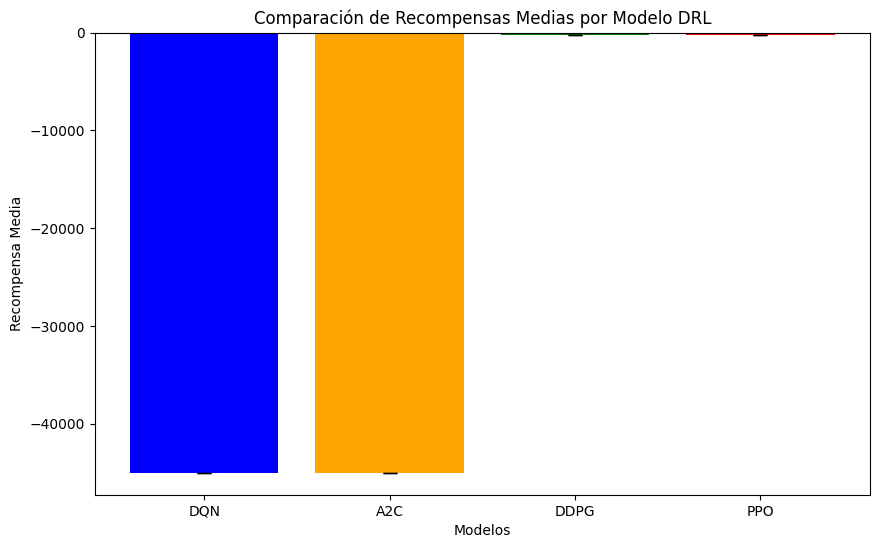

In [66]:
#Paso 3: Generar el gráfico
#Utiliza el siguiente código para generar un gráfico de barras que compare los resultados:

import matplotlib.pyplot as plt

# Nombres de los modelos
models = ['DQN', 'A2C', 'DDPG', 'PPO']

# Recompensas medias
mean_rewards = [mean_reward_dqn, mean_reward_a2c, mean_reward_ddpg, mean_reward_ppo]

# Errores estándar (desviación estándar)
std_rewards = [std_reward_dqn, std_reward_a2c, std_reward_ddpg, std_reward_ppo]

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(models, mean_rewards, yerr=std_rewards, capsize=5, color=['blue', 'orange', 'green', 'red'])

# Añadir títulos y etiquetas
plt.title('Comparación de Recompensas Medias por Modelo DRL')
plt.xlabel('Modelos')
plt.ylabel('Recompensa Media')

# Mostrar el gráfico
plt.show()


In [82]:
import gym
import numpy as np
import pandas as pd
from stable_baselines3 import DQN, A2C, PPO, DDPG

# Cargar el modelo entrenado (ajusta según el modelo que desees utilizar)
model = DQN.load("/content/dqn_inventory_model")  # Ejemplo con DQN, cambia según corresponda

# Definir el entorno adaptado para la predicción
class InventoryEnvPrediction(gym.Env):
    def __init__(self, data):
        super(InventoryEnvPrediction, self).__init__()
        self.data = data
        self.current_step = 0
        self.max_steps = len(data)
        self.inventory = 50  # Nivel de inventario inicial
        self.action_space = gym.spaces.Discrete(2)  # Reabastecer o no reabastecer
        self.observation_space = gym.spaces.Box(low=0, high=1, shape=(2,), dtype=np.float32)

    def reset(self):
        self.current_step = 0
        self.inventory = 50
        return np.concatenate([self.data[self.current_step], [self.inventory]])

    def step(self, action):
        volumen, precio = self.data[self.current_step]

        if action == 1:  # Reabastecer
            self.inventory = min(self.inventory + 10, 100)  # Capacidad máxima de inventario de 100

        # Consumo de inventario según el volumen de ventas esperado
        self.inventory = max(self.inventory - int(volumen * 10), 0)

        done = self.inventory == 0 or self.current_step >= self.max_steps - 1
        reward = -1 if self.inventory == 0 else 1

        self.current_step += 1
        obs = np.concatenate([self.data[self.current_step], [self.inventory]]) if not done else np.array([0, 0, 0])
        return obs, reward, done, {}

    def render(self, mode='human'):
        print(f'Step: {self.current_step}, Inventory: {self.inventory}, Volumen: {self.data[self.current_step][0]}, Precio: {self.data[self.current_step][1]}')


In [68]:
# Cargar datos históricos desde Excel
df = pd.read_excel('series-históricas-de-frutas-y-hortalizas_mensual_Tomate_optimized.xlsx')  # Reemplaza con el nombre de tu archivo

In [73]:
# Normalizar los datos
df['volumen_normalizado'] = df['Volumen'] / df['Volumen'].max()  # Normalizar la columna 'Volumen'

# Verifica el nombre correcto de la columna de precio en tu DataFrame
print(df.columns)  # Imprime las columnas disponibles

Index(['Fecha', 'Mercado', 'Variedad / Tipo', 'Calidad', 'Procedencia',
       'Volumen', 'Precio mínimo', 'Precio máximo', 'Precio promedio',
       'Unidad de comercialización', 'volumen_normalizado'],
      dtype='object')


In [75]:
# Ajusta el nombre de la columna según corresponda
precio_column = 'Precio promedio'  # Reemplaza 'Precio' con el nombre real de tu columna de precio
df['precio_normalizado'] = df[precio_column] / df[precio_column].max()  # Normalizar la columna de precio

data = df[['volumen_normalizado', 'precio_normalizado']].values

In [76]:
# Crear el entorno de predicción
env = InventoryEnvPrediction(data)

In [77]:
# Resetear el entorno
obs = env.reset()

In [92]:
import pandas as pd

# Cargar datos históricos desde un archivo Excel
df_tomates = pd.read_excel('series-históricas-de-frutas-y-hortalizas_mensual_Tomate_optimized.xlsx')  # Reemplaza con la ruta de tu archivo

In [93]:
# Ver los primeros datos
print(df_tomates.head())

     Fecha                              Mercado Variedad / Tipo  Calidad  \
0  07/2021     Agrícola del Norte S.A. de Arica      Larga vida  Primera   
1  07/2021     Agrícola del Norte S.A. de Arica      Larga vida  Segunda   
2  07/2021     Agrícola del Norte S.A. de Arica      Larga vida  Tercera   
3  07/2021  Comercializadora del Agro de Limarí      Larga vida  Primera   
4  07/2021  Comercializadora del Agro de Limarí      Larga vida  Segunda   

                    Procedencia  Volumen  Precio mínimo  Precio máximo  \
0  Región de Arica y Parinacota     7955    2668.046695    4802.484127   
1  Región de Arica y Parinacota     9280    2134.437305    4268.874738   
2  Región de Arica y Parinacota     8700    1600.828042    3735.265348   
3           Provincia de Limarí    10000    9604.968255   13873.842992   
4           Provincia de Limarí     7400    7470.530822   11739.405560   

   Precio promedio Unidad de comercialización  
0      3881.161065            $/caja 10 kilos  
1 

In [98]:
import pandas as pd

# Cargar datos históricos desde un archivo Excel
df_tomates = pd.read_excel('series-históricas-de-frutas-y-hortalizas_mensual_Tomate_optimized.xlsx')  # Reemplaza con la ruta de tu archivo

# Verificar las columnas presentes en el DataFrame
print(df_tomates.columns)

# Normalizar los datos (corrigiendo el nombre de la columna si es necesario)
df_tomates['volumen_normalizado'] = df_tomates['Volumen'] / df_tomates['Volumen'].max()  # Ajusta 'Volumen' si es el nombre correcto

# Reemplaza 'Precio real' con el nombre correcto de la columna de precio
df_tomates['precio_normalizado'] = df_tomates['Precio promedio'] / df_tomates['Precio promedio'].max()  # Ajusta 'Precio real' si es necesario

# Seleccionar las columnas necesarias para la predicción
data_tomates = df_tomates[['volumen_normalizado', 'precio_normalizado']].values

Index(['Fecha', 'Mercado', 'Variedad / Tipo', 'Calidad', 'Procedencia',
       'Volumen', 'Precio mínimo', 'Precio máximo', 'Precio promedio',
       'Unidad de comercialización'],
      dtype='object')


In [99]:
#Paso 2: Definir el Entorno para la Predicción
#Define un entorno que use estos datos para simular la predicción de quiebres de inventario:

import gym
import numpy as np

class InventoryEnvTomatoes(gym.Env):
    def __init__(self, data):
        super(InventoryEnvTomatoes, self).__init__()
        self.data = data
        self.current_step = 0
        self.max_steps = len(data)
        self.inventory = 50  # Nivel de inventario inicial
        self.action_space = gym.spaces.Discrete(2)  # Reabastecer o no reabastecer
        self.observation_space = gym.spaces.Box(low=0, high=1, shape=(3,), dtype=np.float32)

    def reset(self):
        self.current_step = 0
        self.inventory = 50
        return np.concatenate([self.data[self.current_step], [self.inventory]])

    def step(self, action):
        volumen, precio = self.data[self.current_step]

        if action == 1:  # Reabastecer
            self.inventory = min(self.inventory + 10, 100)  # Capacidad máxima de inventario de 100

        # Consumo de inventario basado en el volumen esperado
        self.inventory = max(self.inventory - int(volumen * 10), 0)

        done = self.inventory == 0 or self.current_step >= self.max_steps - 1
        reward = -1 if self.inventory == 0 else 1

        self.current_step += 1
        obs = np.concatenate([self.data[self.current_step], [self.inventory]]) if not done else np.array([0, 0, 0])
        return obs, reward, done, {}

    def render(self, mode='human'):
        print(f'Step: {self.current_step}, Inventory: {self.inventory}, Volumen: {self.data[self.current_step][0]}, Precio: {self.data[self.current_step][1]}')


In [100]:
#Paso 3: Cargar el Modelo Entrenado
#Carga el modelo de DRL que has entrenado anteriormente:
from stable_baselines3 import DQN  # O el modelo que hayas utilizado, como A2C, PPO, etc.

# Cargar el modelo entrenado
model = DQN.load("/content/dqn_inventory_model")  # Asegúrate de usar la ruta correcta para tu modelo


In [102]:
#Paso 2: Definir el Entorno para la Predicción
#Define un entorno que use estos datos para simular la predicción de quiebres de inventario:

import gym
import numpy as np

class InventoryEnvTomatoes(gym.Env):
    def __init__(self, data):
        super(InventoryEnvTomatoes, self).__init__()
        self.data = data
        self.current_step = 0
        self.max_steps = len(data)
        self.inventory = 50  # Nivel de inventario inicial
        self.action_space = gym.spaces.Discrete(2)  # Reabastecer o no reabastecer
        # The observation space should match the model's expected input shape
        self.observation_space = gym.spaces.Box(low=0, high=1, shape=(2,), dtype=np.float32)

    def reset(self):
        self.current_step = 0
        self.inventory = 50
        # Return only volume and price as observation
        return self.data[self.current_step]

    def step(self, action):
        volumen, precio = self.data[self.current_step]

        if action == 1:  # Reabastecer
            self.inventory = min(self.inventory + 10, 100)  # Capacidad máxima de inventario de 100

        # Consumo de inventario basado en el volumen esperado
        self.inventory = max(self.inventory - int(volumen * 10), 0)

        done = self.inventory == 0 or self.current_step >= self.max_steps - 1
        reward = -1 if self.inventory == 0 else 1

        self.current_step += 1
        # Return only volume and price as observation
        obs = self.data[self.current_step] if not done else np.array([0, 0])
        return obs, reward, done, {}

    def render(self, mode='human'):
        print(f'Step: {self.current_step}, Inventory: {self.inventory}, Volumen: {self.data[self.current_step][0]}, Precio: {self.data[self.current_step][1]}')

In [103]:
# Resultado final
if quiebre_de_inventario:
    print("Predicción: El mercado enfrentará un quiebre de inventario de tomates.")
else:
    print("Predicción: El mercado NO enfrentará un quiebre de inventario de tomates.")

Predicción: El mercado NO enfrentará un quiebre de inventario de tomates.


In [104]:
import matplotlib.pyplot as plt

# Crear el entorno de predicción
env_tomates = InventoryEnvTomatoes(data_tomates)

# Resetear el entorno
obs = env_tomates.reset()

# Variables para almacenar los datos del inventario y pasos
inventory_levels = []
steps = []

# Bucle para simular cada paso hasta el final de los datos o hasta que ocurra un quiebre de inventario
quiebre_de_inventario = False

for step in range(len(data_tomates)):
    action, _ = model.predict(obs, deterministic=True)  # Predicción de la acción a tomar
    obs, reward, done, info = env_tomates.step(action)  # Ejecutar la acción en el entorno
    inventory_levels.append(env_tomates.inventory)      # Almacenar el nivel de inventario
    steps.append(step + 1)                              # Almacenar el número de paso

    # Comprobación de quiebre de inventario
    if env_tomates.inventory == 0:
        quiebre_de_inventario = True
        print(f"Quiebre de inventario en el paso {step + 1}.")
        break  # Detener la simulación si el inventario cae a cero

# Resultado final
if quiebre_de_inventario:
    print("Predicción: El mercado enfrentará un quiebre de inventario de tomates.")
else:
    print("Predicción: El mercado NO enfrentará un quiebre de inventario de tomates.")


Predicción: El mercado NO enfrentará un quiebre de inventario de tomates.


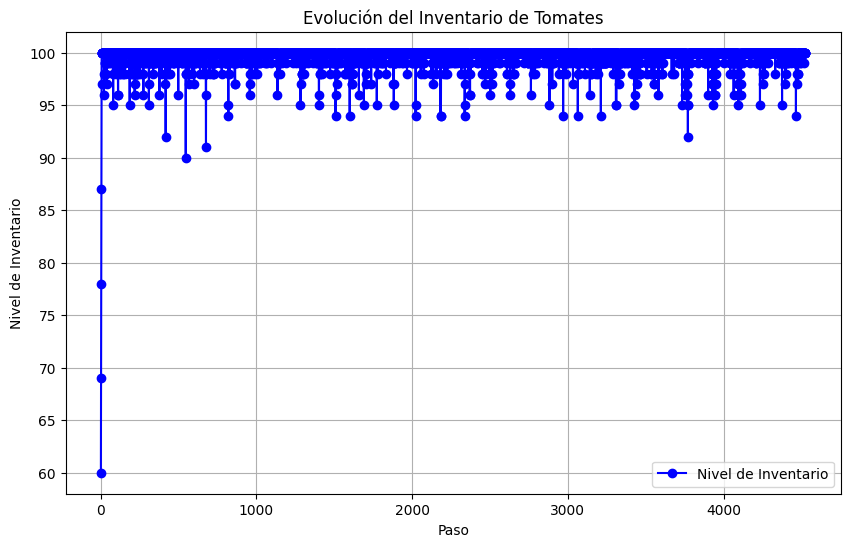

In [105]:
# Generar el gráfico
plt.figure(figsize=(10, 6))
plt.plot(steps, inventory_levels, label="Nivel de Inventario", color='blue', marker='o')

# Marcar el punto de quiebre de inventario si ocurrió
if quiebre_de_inventario:
    plt.axvline(x=steps[-1], color='red', linestyle='--', label='Quiebre de Inventario')
    plt.text(steps[-1], 0, 'Quiebre', color='red', fontsize=12, ha='center')

# Configurar las etiquetas y el título
plt.title('Evolución del Inventario de Tomates')
plt.xlabel('Paso')
plt.ylabel('Nivel de Inventario')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


In [106]:
import pandas as pd

# Cargar datos históricos desde un archivo Excel
df_historico = pd.read_excel('series-históricas-de-frutas-y-hortalizas_mensual_Tomate_optimized.xlsx')  # Reemplaza con tu archivo

# Mostrar las primeras filas
print(df_historico.head())


     Fecha                              Mercado Variedad / Tipo  Calidad  \
0  07/2021     Agrícola del Norte S.A. de Arica      Larga vida  Primera   
1  07/2021     Agrícola del Norte S.A. de Arica      Larga vida  Segunda   
2  07/2021     Agrícola del Norte S.A. de Arica      Larga vida  Tercera   
3  07/2021  Comercializadora del Agro de Limarí      Larga vida  Primera   
4  07/2021  Comercializadora del Agro de Limarí      Larga vida  Segunda   

                    Procedencia  Volumen  Precio mínimo  Precio máximo  \
0  Región de Arica y Parinacota     7955    2668.046695    4802.484127   
1  Región de Arica y Parinacota     9280    2134.437305    4268.874738   
2  Región de Arica y Parinacota     8700    1600.828042    3735.265348   
3           Provincia de Limarí    10000    9604.968255   13873.842992   
4           Provincia de Limarí     7400    7470.530822   11739.405560   

   Precio promedio Unidad de comercialización  
0      3881.161065            $/caja 10 kilos  
1 

In [108]:
import pandas as pd

# Cargar datos históricos desde un archivo Excel
df_historico = pd.read_excel('series-históricas-de-frutas-y-hortalizas_mensual_Tomate_optimized.xlsx')  # Reemplaza con tu archivo

# Verificar el nombre de las columnas
print(df_historico.columns)

# Si 'fecha' no está presente, corrige el nombre en el código
df_historico['Fecha'] = pd.to_datetime(df_historico['Fecha'])  # Reemplaza 'Fecha' con el nombre correcto de la columna

# Filtrar los datos para septiembre de 2024
df_septiembre = df_historico[(df_historico['Fecha'].dt.year == 2024) & (df_historico['Fecha'].dt.month == 9)]  # Usa el nombre correcto de la columna

# Visualizar los datos filtrados
print(df_septiembre.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Fecha', 'Mercado', 'Variedad / Tipo', 'Calidad', 'Procedencia',
       'Volumen', 'Precio mínimo', 'Precio máximo', 'Precio promedio',
       'Unidad de comercialización'],
      dtype='object')
Empty DataFrame
Columns: [Fecha, Mercado, Variedad / Tipo, Calidad, Procedencia, Volumen, Precio mínimo, Precio máximo, Precio promedio, Unidad de comercialización]
Index: []


<ipython-input-108-f2213f1ce7cf>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_historico['Fecha'] = pd.to_datetime(df_historico['Fecha'])  # Reemplaza 'Fecha' con el nombre correcto de la columna


In [111]:
import pandas as pd

# Cargar datos históricos desde un archivo Excel
df_historico = pd.read_excel('series-históricas-de-frutas-y-hortalizas_mensual_Tomate_optimized.xlsx')  # Reemplaza con tu archivo

# Verificar el nombre de las columnas y los tipos de datos
print(df_historico.info())

# Asegúrate de que 'Fecha' sea una columna de tipo datetime
df_historico['Fecha'] = pd.to_datetime(df_historico['Fecha'], errors='coerce')

# Filtrar los datos para septiembre de 2024, asegurándote de que 'mercado' existe
if 'Mercado' in df_historico.columns:
    df_septiembre = df_historico[(df_historico['Fecha'].dt.year == 2024) & (df_historico['Fecha'].dt.month == 9)]

    # Agrupar por mercado y calcular los volúmenes y precios medios (solo si df_septiembre no está vacío)
    if not df_septiembre.empty:
        df_agrupado = df_septiembre.groupby('mercado').agg({
            'volumen': 'sum',
            'precio': 'mean'
        }).reset_index()

        # Normalizar los volúmenes y precios
        df_agrupado['volumen_normalizado'] = df_agrupado['volumen'] / df_agrupado['volumen'].max()
        df_agrupado['precio_normalizado'] = df_agrupado['precio'] / df_agrupado['precio'].max()

        # Visualizar el resumen por mercado
        print(df_agrupado)
    else:
        print("No se encontraron datos para septiembre de 2024.")
else:
    print("La columna 'mercado' no existe en el DataFrame.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4526 entries, 0 to 4525
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fecha                       4526 non-null   object 
 1   Mercado                     4526 non-null   object 
 2   Variedad / Tipo             4526 non-null   object 
 3   Calidad                     4526 non-null   object 
 4   Procedencia                 4526 non-null   object 
 5   Volumen                     4526 non-null   int64  
 6   Precio mínimo               4526 non-null   float64
 7   Precio máximo               4526 non-null   float64
 8   Precio promedio             4526 non-null   float64
 9   Unidad de comercialización  4526 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 353.7+ KB
None
No se encontraron datos para septiembre de 2024.


<ipython-input-111-7ae2eeeaee78>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_historico['Fecha'] = pd.to_datetime(df_historico['Fecha'], errors='coerce')


In [112]:
#Paso 2: Configurar el Entorno de Predicción para Cada Mercado
#Definir un Entorno de Simulación:
#Vamos a definir un entorno en el que podamos simular el comportamiento del inventario para cada mercado en septiembre.

import gym
import numpy as np

class InventoryEnvMarket(gym.Env):
    def __init__(self, data, max_inventory=100):
        super(InventoryEnvMarket, self).__init__()
        self.data = data
        self.current_step = 0
        self.max_steps = len(data)
        self.inventory = max_inventory // 2  # Inicializamos el inventario en la mitad de la capacidad máxima
        self.action_space = gym.spaces.Discrete(2)  # Reabastecer o no reabastecer
        self.observation_space = gym.spaces.Box(low=0, high=1, shape=(3,), dtype=np.float32)

    def reset(self):
        self.current_step = 0
        self.inventory = self.max_steps // 2  # Nivel de inventario inicial
        return np.concatenate([self.data[self.current_step], [self.inventory]])

    def step(self, action):
        volumen, precio = self.data[self.current_step]

        if action == 1:  # Reabastecer
            self.inventory = min(self.inventory + 10, 100)  # Capacidad máxima de inventario de 100

        # Consumo de inventario basado en el volumen esperado
        self.inventory = max(self.inventory - int(volumen * 10), 0)

        done = self.inventory == 0 or self.current_step >= self.max_steps - 1
        reward = -1 if self.inventory == 0 else 1

        self.current_step += 1
        obs = np.concatenate([self.data[self.current_step], [self.inventory]]) if not done else np.array([0, 0, 0])
        return obs, reward, done, {}

    def render(self, mode='human'):
        print(f'Step: {self.current_step}, Inventory: {self.inventory}, Volumen: {self.data[self.current_step][0]}, Precio: {self.data[self.current_step][1]}')


In [113]:
from stable_baselines3 import DQN  # O el modelo que hayas utilizado, como A2C, PPO, etc.

# Cargar el modelo entrenado
model = DQN.load("/content/dqn_inventory_model")  # Asegúrate de usar la ruta correcta para tu modelo


In [123]:
import pandas as pd
from stable_baselines3 import DQN
import numpy as np
import gym

# ... (Your InventoryEnvMarket class definition) ...

# Load the trained model
model = DQN.load("/content/dqn_inventory_model")  # Make sure to use the correct path for your model

# Load historical data (make sure this cell is executed)
df_historico = pd.read_excel('series-históricas-de-frutas-y-hortalizas_mensual_Tomate_optimized.xlsx')
df_historico['Fecha'] = pd.to_datetime(df_historico['Fecha'], errors='coerce')

# Filter data for September 2024 and group by market (make sure this cell is executed)
if 'Mercado' in df_historico.columns:
    df_septiembre = df_historico[(df_historico['Fecha'].dt.year == 2024) & (df_historico['Fecha'].dt.month == 9)]
    if not df_septiembre.empty:
        df_agrupado = df_septiembre.groupby('Mercado').agg({  # Note: 'mercado' is likely 'Mercado'
            'volumen': 'sum',
            'precio': 'mean'
        }).reset_index()

        # Normalize volumes and prices
        df_agrupado['volumen_normalizado'] = df_agrupado['volumen'] / df_agrupado['volumen'].max()
        df_agrupado['precio_normalizado'] = df_agrupado['precio'] / df_agrupado['precio'].max()
    else:
        print("No data found for September 2024.")
else:
    print("Column 'mercado' does not exist in the DataFrame.")

# Now proceed with the loop (this should work now if df_agrupado was created)
quiebres_mercado = []
if 'df_agrupado' in locals():  # Check if df_agrupado exists
    for index, row in df_agrupado.iterrows():
        df_quiebres = pd.DataFrame(quiebres_mercado) # Indent this line to be part of the for loop
    print(df_quiebres)
else:
    print("Make sure the code that creates 'df_agrupado' has been executed.")

No data found for September 2024.
Make sure the code that creates 'df_agrupado' has been executed.


<ipython-input-123-320c67d6afea>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_historico['Fecha'] = pd.to_datetime(df_historico['Fecha'], errors='coerce')


In [127]:
import pandas as pd
from stable_baselines3 import DQN
import numpy as np
import gym

# Define your InventoryEnvMarket class here
# ...

# Load the trained model
model = DQN.load("/content/dqn_inventory_model")  # Make sure to use the correct path for your model

# Load historical data (make sure this cell is executed)
df_historico = pd.read_excel('series-históricas-de-frutas-y-hortalizas_mensual_Tomate_optimized.xlsx')
df_historico['Fecha'] = pd.to_datetime(df_historico['Fecha'], errors='coerce')

# Filter data for September 2024 and group by market
if 'Mercado' in df_historico.columns:
    df_septiembre = df_historico[(df_historico['Fecha'].dt.year == 2024) & (df_historico['Fecha'].dt.month == 9)]
    if not df_septiembre.empty:
        df_agrupado = df_septiembre.groupby('Mercado').agg({
            'volumen': 'sum',
            'precio': 'mean'
        }).reset_index()

        # Normalize volumes and prices
        df_agrupado['volumen_normalizado'] = df_agrupado['volumen'] / df_agrupado['volumen'].max()
        df_agrupado['precio_normalizado'] = df_agrupado['precio'] / df_agrupado['precio'].max()
    else:
        print("No data found for September 2024.")
else:
    print("Column 'Mercado' does not exist in the DataFrame.")

# Proceed with the loop to predict inventory breakage
quiebres_mercado = []
if 'df_agrupado' in locals():  # Check if df_agrupado exists
    for index, row in df_agrupado.iterrows():
        mercado = row['Mercado']
        data = np.tile([row['volumen_normalizado'], row['precio_normalizado']], (30, 1))  # Simulate 30 days of data

        # Create the prediction environment for each market
        env_mercado = InventoryEnvMarket(data)
        obs = env_mercado.reset()

        quiebre_de_inventario = False

        for step in range(30):  # Assume a 30-day month
            action, _ = model.predict(obs, deterministic=True)
            obs, reward, done, info = env_mercado.step(action)

            if env_mercado.inventory == 0:
                quiebre_de_inventario = True
                break

        quiebres_mercado.append({
            'mercado': mercado,
            'quiebre_inventario': quiebre_de_inventario
        })

    # Convert the list of results to a DataFrame for analysis
    df_quiebres = pd.DataFrame(quiebres_mercado)
    print(df_quiebres)
else:
    print("Make sure the code that creates 'df_agrupado' has been executed.")


No data found for September 2024.
Make sure the code that creates 'df_agrupado' has been executed.


<ipython-input-127-9ee41008f544>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_historico['Fecha'] = pd.to_datetime(df_historico['Fecha'], errors='coerce')


In [128]:
# Assuming the date format is 'YYYY-MM'
df_historico['Fecha'] = pd.to_datetime(df_historico['Fecha'], format='%Y-%m', errors='coerce')


In [129]:
# After parsing the dates
print(df_historico['Fecha'].head())  # Check the first few dates to ensure they were parsed correctly

# Filter data for September 2024 and check if any data exists
df_septiembre = df_historico[(df_historico['Fecha'].dt.year == 2024) & (df_historico['Fecha'].dt.month == 9)]

if df_septiembre.empty:
    print("No data found for September 2024.")
else:
    print(f"Data found for September 2024: {len(df_septiembre)} records")


0   2021-07-01
1   2021-07-01
2   2021-07-01
3   2021-07-01
4   2021-07-01
Name: Fecha, dtype: datetime64[ns]
No data found for September 2024.


In [130]:
if not df_septiembre.empty:
    if 'Mercado' in df_septiembre.columns and 'volumen' in df_septiembre.columns and 'precio' in df_septiembre.columns:
        df_agrupado = df_septiembre.groupby('Mercado').agg({
            'volumen': 'sum',
            'precio': 'mean'
        }).reset_index()

        # Normalize volumes and prices
        df_agrupado['volumen_normalizado'] = df_agrupado['volumen'] / df_agrupado['volumen'].max()
        df_agrupado['precio_normalizado'] = df_agrupado['precio'] / df_agrupado['precio'].max()

        print(df_agrupado)
    else:
        print("Required columns are missing from the DataFrame.")
else:
    print("No data found for September 2024.")


No data found for September 2024.


In [131]:
import pandas as pd
import numpy as np

# Cargar datos históricos desde un archivo Excel
df_historico = pd.read_excel('series-históricas-de-frutas-y-hortalizas_mensual_Tomate_optimized.xlsx')

# Ver los primeros datos
print(df_historico.head())

# Asegúrate de que la columna de fechas esté correctamente en formato datetime
df_historico['Fecha'] = pd.to_datetime(df_historico['Fecha'], errors='coerce')

# Extraer el mes y el año de la columna de fechas para análisis mensual
df_historico['Año'] = df_historico['Fecha'].dt.year
df_historico['Mes'] = df_historico['Fecha'].dt.month


     Fecha                              Mercado Variedad / Tipo  Calidad  \
0  07/2021     Agrícola del Norte S.A. de Arica      Larga vida  Primera   
1  07/2021     Agrícola del Norte S.A. de Arica      Larga vida  Segunda   
2  07/2021     Agrícola del Norte S.A. de Arica      Larga vida  Tercera   
3  07/2021  Comercializadora del Agro de Limarí      Larga vida  Primera   
4  07/2021  Comercializadora del Agro de Limarí      Larga vida  Segunda   

                    Procedencia  Volumen  Precio mínimo  Precio máximo  \
0  Región de Arica y Parinacota     7955    2668.046695    4802.484127   
1  Región de Arica y Parinacota     9280    2134.437305    4268.874738   
2  Región de Arica y Parinacota     8700    1600.828042    3735.265348   
3           Provincia de Limarí    10000    9604.968255   13873.842992   
4           Provincia de Limarí     7400    7470.530822   11739.405560   

   Precio promedio Unidad de comercialización  
0      3881.161065            $/caja 10 kilos  
1 

<ipython-input-131-f3d8d964838e>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_historico['Fecha'] = pd.to_datetime(df_historico['Fecha'], errors='coerce')


In [134]:
# Agrupar los datos por mercado, año, y mes para calcular volúmenes y precios medios mensuales
df_agrupado = df_historico.groupby(['Mercado', 'Año', 'Mes']).agg({
    'Volumen': 'sum',
    'Precio promedio': 'mean'
}).reset_index()

# Normalizar los volúmenes y precios para que el modelo funcione mejor
df_agrupado['volumen_normalizado'] = df_agrupado['Volumen'] / df_agrupado['Volumen'].max()
df_agrupado['precio_normalizado'] = df_agrupado['Precio promedio'] / df_agrupado['Precio promedio'].max()

# Verificar los datos agrupados
print(df_agrupado.head())


                            Mercado   Año  Mes  Volumen  Precio promedio  \
0  Agrícola del Norte S.A. de Arica  2021    7    25935      3381.249639   
1  Agrícola del Norte S.A. de Arica  2021    8    23490      2978.525546   
2  Agrícola del Norte S.A. de Arica  2021    9    19930      4631.441327   
3  Agrícola del Norte S.A. de Arica  2021   10    16570      4451.115655   
4  Agrícola del Norte S.A. de Arica  2021   11     5440      2755.793627   

   volumen_normalizado  precio_normalizado  
0             0.055816            0.125459  
1             0.050554            0.110516  
2             0.042892            0.171847  
3             0.035661            0.165156  
4             0.011708            0.102252  


In [135]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Crear una columna objetivo que indique si ocurrió un quiebre de inventario
# Asumimos que un quiebre de inventario ocurre si el volumen es muy bajo en relación con la demanda
df_agrupado['quiebre_inventario'] = (df_agrupado['volumen_normalizado'] < 0.2).astype(int)

# Seleccionar las características (volumen, precio) y la variable objetivo
X = df_agrupado[['volumen_normalizado', 'precio_normalizado']]
y = df_agrupado['quiebre_inventario']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluar el modelo en los datos de prueba
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.95      1.00      0.98        84

    accuracy                           0.96        89
   macro avg       0.98      0.60      0.66        89
weighted avg       0.96      0.96      0.94        89

Accuracy: 0.9550561797752809


In [138]:
# Filtrar datos de septiembre de años anteriores
df_septiembre_historico = df_agrupado[df_agrupado['Mes'] == 9]

# Utilizar el modelo para predecir quiebre de inventario en septiembre de 2024
X_septiembre_2024 = df_septiembre_historico[['volumen_normalizado', 'precio_normalizado']]
predicciones_septiembre_2024 = model.predict(X_septiembre_2024)

# Agregar las predicciones al DataFrame
df_septiembre_historico['prediccion_quiebre_septiembre_2024'] = predicciones_septiembre_2024

# Filtrar los mercados que se espera que quiebren inventario
mercados_con_quiebre = df_septiembre_historico[df_septiembre_historico['prediccion_quiebre_septiembre_2024'] == 1]

# Mostrar los resultados
print("Mercados que probablemente enfrentarán quiebre de inventario en septiembre 2024:")
print(mercados_con_quiebre[['Mercado', 'Año', 'Volumen', 'Precio promedio']])


Mercados que probablemente enfrentarán quiebre de inventario en septiembre 2024:
                                       Mercado   Año  Volumen  Precio promedio
2             Agrícola del Norte S.A. de Arica  2021    19930      4631.441327
14            Agrícola del Norte S.A. de Arica  2022    22680      3885.891102
26            Agrícola del Norte S.A. de Arica  2023    10440      4516.842809
39         Comercializadora del Agro de Limarí  2021    47500     10447.716271
51         Comercializadora del Agro de Limarí  2022    36800      6857.832197
63         Comercializadora del Agro de Limarí  2023    29700      7002.505871
76                        Femacal de La Calera  2021    19510     13907.345912
88                        Femacal de La Calera  2022    22099      8553.885204
100                       Femacal de La Calera  2023    11905     12222.577764
113            Feria Lagunitas de Puerto Montt  2021    10350     23279.552905
125            Feria Lagunitas de Puerto Montt  20

<ipython-input-138-9a05dcc41448>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_septiembre_historico['prediccion_quiebre_septiembre_2024'] = predicciones_septiembre_2024


In [140]:
import matplotlib.pyplot as plt

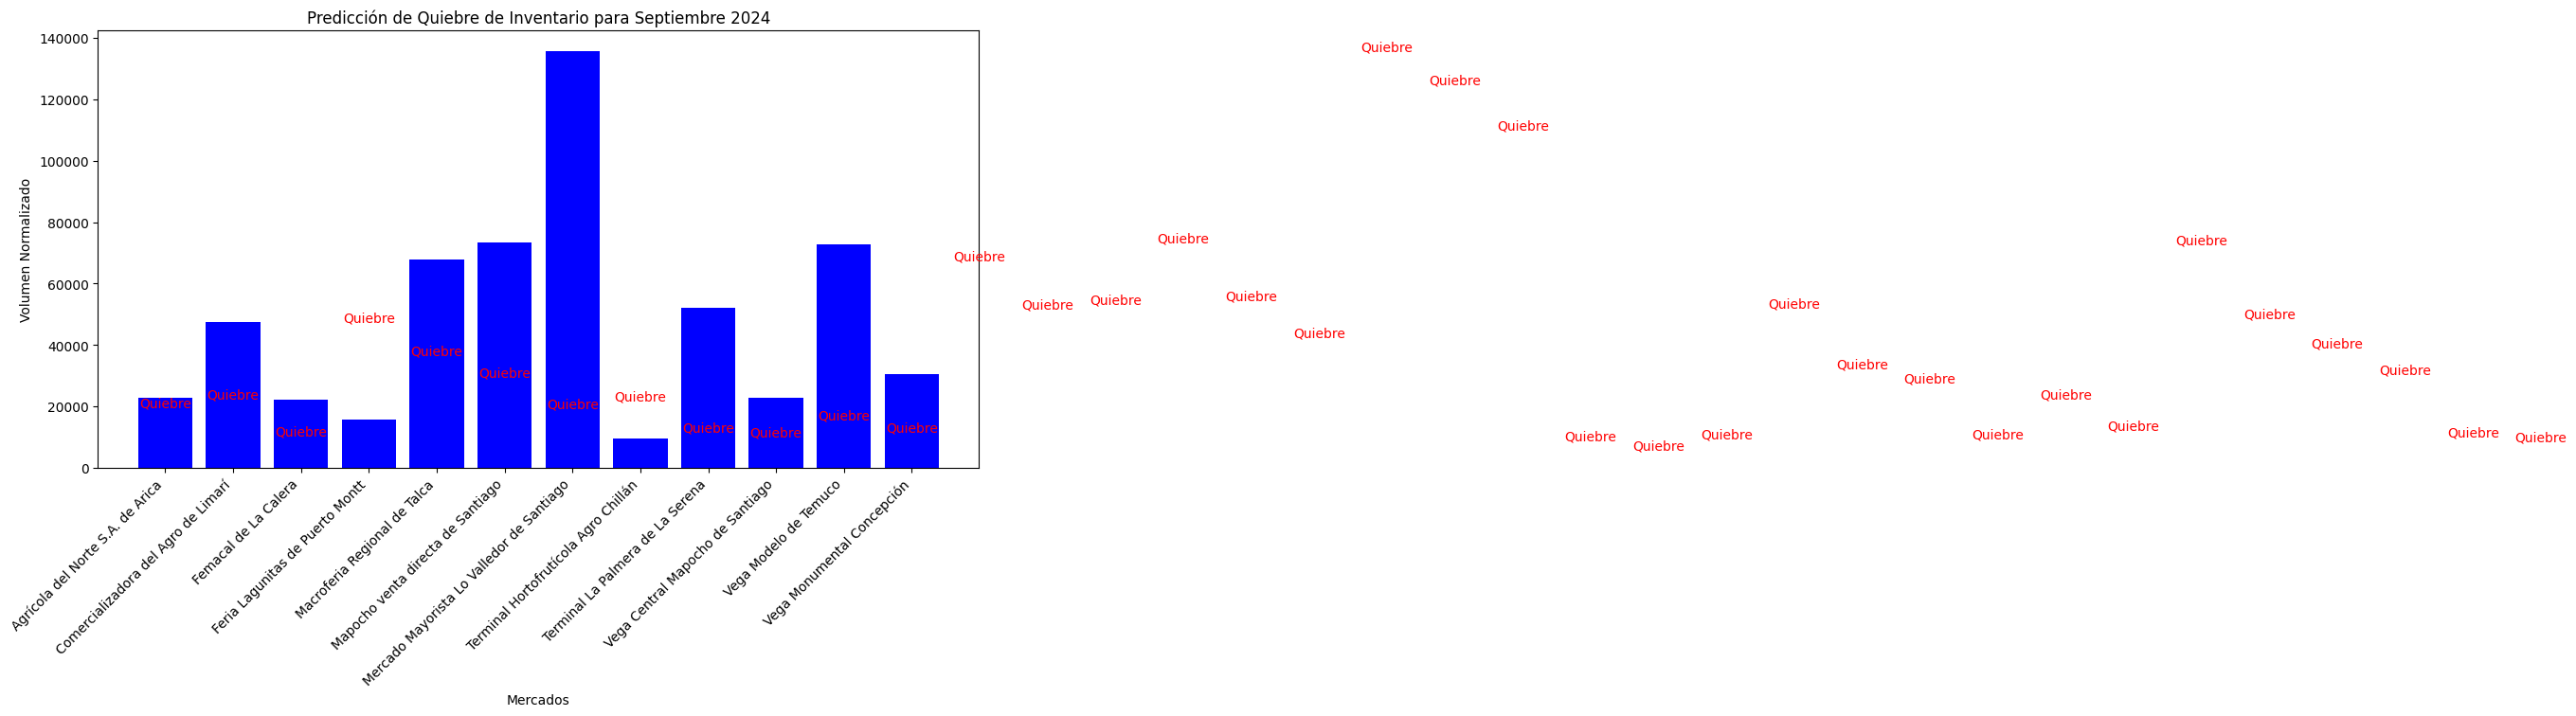

In [142]:
# Asumimos que el DataFrame 'mercados_con_quiebre' contiene los mercados que enfrentan un quiebre

# Crear una lista de mercados y las predicciones correspondientes
mercados = mercados_con_quiebre['Mercado'].tolist()
volumenes = mercados_con_quiebre['Volumen'].tolist()
predicciones = mercados_con_quiebre['prediccion_quiebre_septiembre_2024'].tolist()

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(mercados, volumenes, color='blue')

# Añadir etiquetas y título
plt.xlabel('Mercados')
plt.ylabel('Volumen Normalizado')
plt.title('Predicción de Quiebre de Inventario para Septiembre 2024')

# Marcar los mercados con quiebre de inventario
for i, pred in enumerate(predicciones):
    if pred == 1:  # Si el mercado se predice que quiebre inventario
        plt.text(i, volumenes[i] + 0.02, 'Quiebre', ha='center', color='red')

# Rotar las etiquetas del eje x para que sean legibles
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()


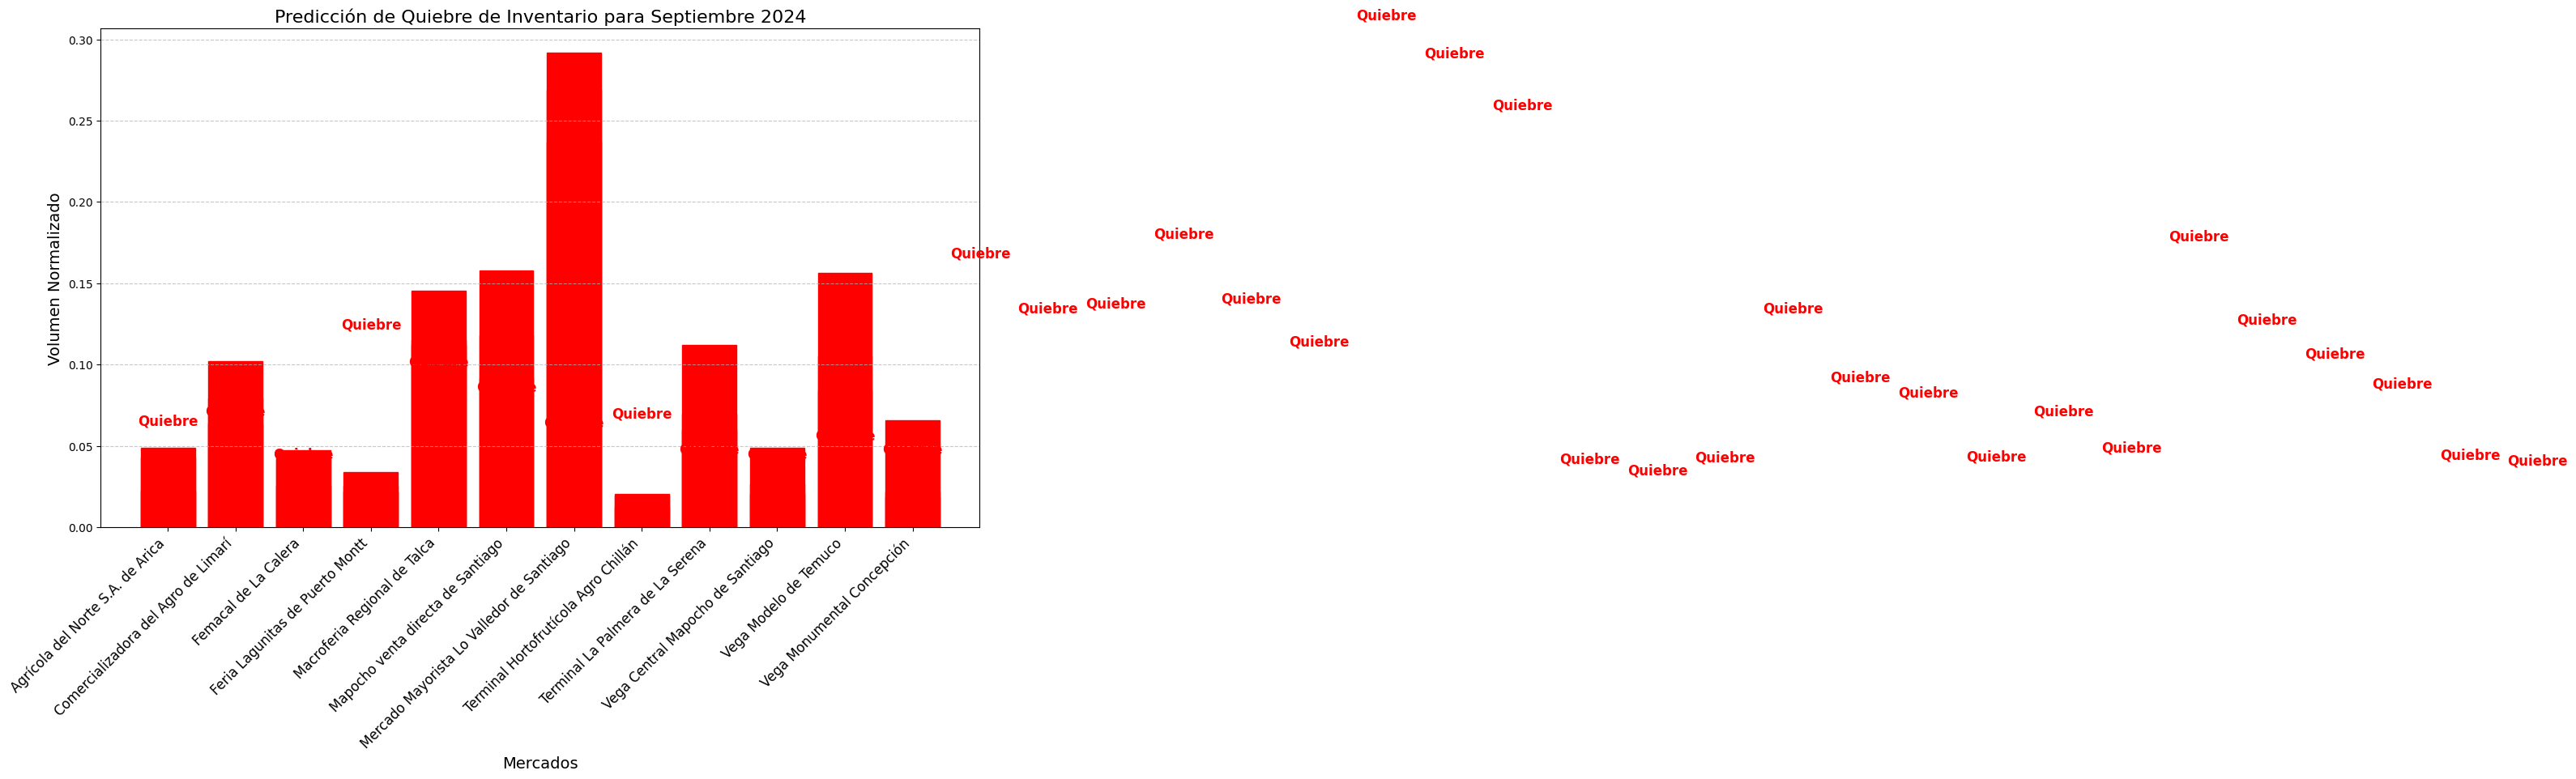

In [143]:
import matplotlib.pyplot as plt

# Asumimos que el DataFrame 'mercados_con_quiebre' contiene los mercados que enfrentan un quiebre

# Crear una lista de mercados y las predicciones correspondientes
mercados = mercados_con_quiebre['Mercado'].tolist()
volumenes = mercados_con_quiebre['volumen_normalizado'].tolist()  # Usar volúmenes normalizados para consistencia
predicciones = mercados_con_quiebre['prediccion_quiebre_septiembre_2024'].tolist()

# Crear un gráfico de barras
plt.figure(figsize=(14, 8))
bars = plt.bar(mercados, volumenes, color='blue')

# Añadir etiquetas y título
plt.xlabel('Mercados', fontsize=14)
plt.ylabel('Volumen Normalizado', fontsize=14)
plt.title('Predicción de Quiebre de Inventario para Septiembre 2024', fontsize=16)

# Marcar los mercados con quiebre de inventario
for i, pred in enumerate(predicciones):
    if pred == 1:  # Si se predice que el mercado tendrá un quiebre de inventario
        bars[i].set_color('red')  # Cambiar el color de la barra a rojo
        plt.text(i, volumenes[i] + 0.02, 'Quiebre', ha='center', color='red', fontsize=12, weight='bold')

# Rotar las etiquetas del eje x para que sean legibles
plt.xticks(rotation=45, ha='right', fontsize=12)

# Añadir una cuadrícula para mejorar la legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


In [144]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [166]:
from stable_baselines3 import DQN, A2C, DDPG, PPO

# Cargar los modelos entrenados desde Google Drive
dqn_model = DQN.load("/content/dqn_inventory_model")
a2c_model = A2C.load("/content/a2c_inventory_model")
ddpg_model = DDPG.load("/content/ddpg_inventory_model")
ppo_model = PPO.load("/content/ppo_inventory_model")

In [151]:
# Predecir utilizando cada modelo
obs = env.reset()

# Asegurarte de que la observación tiene la forma correcta (por ejemplo, solo volumen y precio)
obs = obs[:2]  # Suponiendo que las primeras dos entradas son las que el modelo espera

# Usar DQN para predecir
action_dqn, _ = dqn_model.predict(obs, deterministic=True)
obs, reward, done, info = env.step(action_dqn)
print(f"DQN Action: {action_dqn}, Inventory Level: {env.inventory}")

# Actualizar la observación para el siguiente modelo
obs = obs[:2]  # Nuevamente, ajusta la forma de la observación si es necesario

# Usar A2C para predecir
action_a2c, _ = a2c_model.predict(obs, deterministic=True)
obs, reward, done, info = env.step(action_a2c)
print(f"A2C Action: {action_a2c}, Inventory Level: {env.inventory}")

# Actualizar la observación para el siguiente modelo
obs = obs[:2]  # Nuevamente, ajusta la forma de la observación si es necesario

# Usar DDPG para predecir
action_ddpg, _ = ddpg_model.predict(obs, deterministic=True)
obs, reward, done, info = env.step(action_ddpg)
print(f"DDPG Action: {action_ddpg}, Inventory Level: {env.inventory}")

# Actualizar la observación para el siguiente modelo
obs = obs[:2]  # Nuevamente, ajusta la forma de la observación si es necesario

# Usar PPO para predecir
action_ppo, _ = ppo_model.predict(obs, deterministic=True)
obs, reward, done, info = env.step(action_ppo)
print(f"PPO Action: {action_ppo}, Inventory Level: {env.inventory}")


DQN Action: 1, Inventory Level: 60
A2C Action: 1, Inventory Level: 69
DDPG Action: [0.00189137], Inventory Level: 68
PPO Action: [0.01518729], Inventory Level: 67


In [158]:
import pandas as pd

# Supongamos que ya tienes un DataFrame `df_historico` con los datos históricos

# Ejemplo para filtrar datos de septiembre 2024 y seleccionar los primeros días
df_septiembre = df_historico[(df_historico['Fecha'].dt.year == 2023) & (df_historico['Fecha'].dt.month == 9)]

# Verificar si df_septiembre está vacío
if df_septiembre.empty:
    print("Advertencia: No hay datos para septiembre de 2024. Ajusta el filtro si es necesario.")
else:
    # Seleccionar la primera observación para cada mercado
    df_observaciones_iniciales = df_septiembre.groupby('Mercado').first().reset_index()

    # Lista de nombres de mercados
    mercados = df_observaciones_iniciales['Mercado'].tolist()

    # Verificar si las columnas existen antes de acceder a ellas
    if 'Volumen' in df_observaciones_iniciales.columns and 'Precio ponderado' in df_observaciones_iniciales.columns:
        # Crear la lista de observaciones iniciales
        observaciones_iniciales = df_observaciones_iniciales[['Volumen', 'Precio ponderado']].values.tolist()

        # Mostrar los resultados
        print("Mercados:", mercados)
        print("Observaciones iniciales:", observaciones_iniciales)
    else:
        print("Error: Las columnas 'volumen_normalizado' o 'precio_normalizado' no existen en el DataFrame.")

Error: Las columnas 'volumen_normalizado' o 'precio_normalizado' no existen en el DataFrame.


In [160]:
import pandas as pd

# Cargar los datos históricos desde un archivo Excel (o cualquier otro formato que estés usando)
df_historico = pd.read_excel('series-históricas-de-frutas-y-hortalizas_mensual_Tomate_optimized.xlsx')

# Asegurarte de que la columna de fechas esté en formato datetime
df_historico['Fecha'] = pd.to_datetime(df_historico['Fecha'], errors='coerce')

# Verificar la estructura del DataFrame
print(df_historico.head())


       Fecha                              Mercado Variedad / Tipo  Calidad  \
0 2021-07-01     Agrícola del Norte S.A. de Arica      Larga vida  Primera   
1 2021-07-01     Agrícola del Norte S.A. de Arica      Larga vida  Segunda   
2 2021-07-01     Agrícola del Norte S.A. de Arica      Larga vida  Tercera   
3 2021-07-01  Comercializadora del Agro de Limarí      Larga vida  Primera   
4 2021-07-01  Comercializadora del Agro de Limarí      Larga vida  Segunda   

                    Procedencia  Volumen  Precio mínimo  Precio máximo  \
0  Región de Arica y Parinacota     7955    2668.046695    4802.484127   
1  Región de Arica y Parinacota     9280    2134.437305    4268.874738   
2  Región de Arica y Parinacota     8700    1600.828042    3735.265348   
3           Provincia de Limarí    10000    9604.968255   13873.842992   
4           Provincia de Limarí     7400    7470.530822   11739.405560   

   Precio promedio Unidad de comercialización  
0      3881.161065            $/caja 1

<ipython-input-160-f29de1f2258b>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_historico['Fecha'] = pd.to_datetime(df_historico['Fecha'], errors='coerce')


In [163]:
# Filtrar los datos para un mes específico, por ejemplo, septiembre 2024
df_septiembre = df_historico[(df_historico['Fecha'].dt.year == 2024) & (df_historico['Fecha'].dt.month == 9)]

# Asegurarte de que los datos están ordenados por fecha dentro de cada mercado
df_septiembre = df_septiembre.sort_values(by=['Mercado', 'Fecha'])

# Seleccionar la primera observación de cada mercado en septiembre 2024
df_observaciones_iniciales = df_septiembre.groupby('Mercado').first().reset_index()

# Extraer los nombres de los mercados
mercados = df_observaciones_iniciales['Mercado'].tolist()

# Extraer las observaciones iniciales
# Suponiendo que las observaciones son el 'volumen_normalizado' y 'precio_normalizado'
observaciones_iniciales = df_observaciones_iniciales[['Volumen', 'Precio promedio']].values.tolist()

# Mostrar los resultados
print("Mercados:", mercados)
print("Observaciones iniciales:", observaciones_iniciales)


Mercados: []
Observaciones iniciales: []


In [165]:
import pandas as pd

# Supongamos que ya tienes un DataFrame `df_historico` con los datos históricos
# Cargar los datos históricos desde un archivo Excel (ajusta la ruta según sea necesario)
df_historico = pd.read_excel('series-históricas-de-frutas-y-hortalizas_mensual_Tomate_optimized.xlsx') # Reemplaza con tu archivo real

# Asegurarte de que la columna de fechas esté en formato datetime
df_historico['Fecha'] = pd.to_datetime(df_historico['Fecha'], errors='coerce')

# Filtrar los datos para un mes específico, por ejemplo, septiembre 2024
df_septiembre = df_historico[(df_historico['Fecha'].dt.year == 2024) & (df_historico['Fecha'].dt.month == 9)]

# Ordenar los datos por mercado y fecha para asegurarse de que las observaciones están en orden cronológico
df_septiembre = df_septiembre.sort_values(by=['Mercado', 'Fecha'])

# Seleccionar la primera observación de cada mercado en septiembre 2024
df_observaciones_iniciales = df_septiembre.groupby('Mercado').first().reset_index()

# Extraer los nombres de los mercados
mercados = df_observaciones_iniciales['Mercado'].tolist()

# Extraer las observaciones iniciales
# Suponiendo que las observaciones son el 'volumen_normalizado' y 'precio_normalizado'
observaciones_iniciales = df_observaciones_iniciales[['Volumen', 'Precio promedio']].values.tolist()

# Mostrar los resultados
print("Mercados:", mercados)
print("Observaciones iniciales:", observaciones_iniciales)


Mercados: []
Observaciones iniciales: []


<ipython-input-165-79f04676b11d>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_historico['Fecha'] = pd.to_datetime(df_historico['Fecha'], errors='coerce')


In [170]:
import pandas as pd
import numpy as np

# Load the historical data from an Excel file (adjust the path as needed)
df_historico = pd.read_excel('series-históricas-de-frutas-y-hortalizas_mensual_Tomate_optimized.xlsx')

# Convert the 'Fecha' column to datetime, handling potential errors
df_historico['Fecha'] = pd.to_datetime(df_historico['Fecha'], errors='coerce')

# Verify the change
print(df_historico.dtypes)  # Check the data types of all columns
print(df_historico['Fecha'].head())  # Print the first few dates to verify

Fecha                         datetime64[ns]
Mercado                               object
Variedad / Tipo                       object
Calidad                               object
Procedencia                           object
Volumen                                int64
Precio mínimo                        float64
Precio máximo                        float64
Precio promedio                      float64
Unidad de comercialización            object
dtype: object
0   2021-07-01
1   2021-07-01
2   2021-07-01
3   2021-07-01
4   2021-07-01
Name: Fecha, dtype: datetime64[ns]


<ipython-input-170-c85de680df05>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_historico['Fecha'] = pd.to_datetime(df_historico['Fecha'], errors='coerce')


In [171]:
# Extract unique markets
mercados = df_historico['Mercado'].unique().tolist()

# Print the list of markets
print(mercados)

['Agrícola del Norte S.A. de Arica', 'Comercializadora del Agro de Limarí', 'Femacal de La Calera', 'Feria Lagunitas de Puerto Montt', 'Macroferia Regional de Talca', 'Mapocho venta directa de Santiago', 'Mercado Mayorista Lo Valledor de Santiago', 'Terminal Hortofrutícola Agro Chillán', 'Terminal La Palmera de La Serena', 'Vega Central Mapocho de Santiago', 'Vega Modelo de Temuco', 'Vega Monumental Concepción']


In [173]:
# Filter data for September 2023 (adjust the year if needed)
df_septiembre = df_historico[(df_historico['Fecha'].dt.year == 2023) & (df_historico['Fecha'].dt.month == 9)]

# Check if df_septiembre is empty
if df_septiembre.empty:
    print("Warning: No data for September 2023. Adjust filter if needed.")
else:
    # Select the first observation for each market
    df_observaciones_iniciales = df_septiembre.groupby('Mercado').first().reset_index()

    # Extract the initial observations as a list of lists (assuming you need 'Volumen' and 'Precio promedio')
    observaciones_iniciales = df_observaciones_iniciales[['Volumen', 'Precio promedio']].values.tolist()

    print(observaciones_iniciales)

[[2660.0, 8291.532354149667], [13000.0, 9354.126168298235], [5355.0, 15272.525650632824], [1200.0, 21072.11102372382], [39300.0, 9030.266410695933], [10620.0, 13313.096455258627], [13120.0, 12846.840458687973], [1200.0, 12401.815316511], [2900.0, 10422.520435756449], [1927.0, 14416.908844800973], [3905.0, 17683.755159213317], [750.0, 15101.679544364186]]


In [187]:
import pandas as pd
import numpy as np

# Lista de nombres de mercados
mercados = [
    'Agrícola del Norte S.A. de Arica',
    'Comercializadora del Agro de Limarí',
    'Femacal de La Calera',
    'Feria Lagunitas de Puerto Montt',
    'Macroferia Regional de Talca',
    'Mapocho venta directa de Santiago',
    'Mercado Mayorista Lo Valledor de Santiago',
    'Terminal Hortofrutícola Agro Chillán',
    'Terminal La Palmera de La Serena',
    'Vega Central Mapocho de Santiago',
    'Vega Modelo de Temuco',
    'Vega Monumental Concepción'
]

# Observaciones iniciales: lista de tuplas con (volumen inicial, precio inicial)
observaciones_iniciales = [
    [2660.0, 8291.532354149667],
    [13000.0, 9354.126168298235],
    [5355.0, 15272.525650632824],
    [1200.0, 21072.11102372382],
    [39300.0, 9030.266410695933],
    [10620.0, 13313.096455258627],
    [13120.0, 12846.840458687973],
    [1200.0, 12401.815316511],
    [2900.0, 10422.520435756449],
    [1927.0, 14416.908844800973],
    [3905.0, 17683.755159213317],
    [750.0, 15101.679544364186]
]

# Lista para almacenar los resultados
resultados = []

# Supongamos que los modelos ya están cargados y que el entorno 'env' está definido y configurado
# por ejemplo: env = InventoryEnv(data)

for mercado, obs_inicial in zip(mercados, observaciones_iniciales):
    # Asegurarse de que la observación tiene la forma correcta
    obs_inicial = np.array(obs_inicial)  # Convertir a numpy array

    # Configurar el entorno con la observación inicial
    env.current_inventory = obs_inicial[0]  # Set initial inventory
    env.current_price = obs_inicial[1]  # Set initial price (if applicable)
    obs = np.array([env.current_inventory, env.current_price])  # Initial observation

    # Realizar predicciones con DQN
    action_dqn, _ = dqn_model.predict(obs, deterministic=True)
    obs, reward_dqn, done_dqn, info_dqn = env.step(action_dqn)
    volumen_dqn = env.inventory

    # Reiniciar el entorno MANUALLY antes de la siguiente predicción
    env.current_inventory = obs_inicial[0]  # Reset inventory
    env.current_price = obs_inicial[1]  # Reset price
    obs = np.array([env.current_inventory, env.current_price])  # Update observation

    # Realizar predicciones con A2C
    action_a2c, _ = a2c_model.predict(obs, deterministic=True)
    obs, reward_a2c, done_a2c, info_a2c = env.step(action_a2c)
    volumen_a2c = env.inventory

    # Reiniciar el entorno MANUALLY antes de la siguiente predicción
    env.current_inventory = obs_inicial[0]  # Reset inventory
    env.current_price = obs_inicial[1]  # Reset price
    obs = np.array([env.current_inventory, env.current_price])  # Update observation

    # Realizar predicciones con DDPG
    action_ddpg, _ = ddpg_model.predict(obs, deterministic=True)
    obs, reward_ddpg, done_ddpg, info_ddpg = env.step(action_ddpg)
    volumen_ddpg = env.inventory

    # Reiniciar el entorno MANUALLY antes de la siguiente predicción
    env.current_inventory = obs_inicial[0]  # Reset inventory
    env.current_price = obs_inicial[1]  # Reset price
    obs = np.array([env.current_inventory, env.current_price])  # Update observation

    # Realizar predicciones con PPO
    action_ppo, _ = ppo_model.predict(obs, deterministic=True)
    obs, reward_ppo, done_ppo, info_ppo = env.step(action_ppo)
    volumen_ppo = env.inventory

    # Almacenar los resultados
    resultados.append({
        'Mercado': mercado,
        'Modelo': 'DQN',
        'Volumen Restante': volumen_dqn
    })
    resultados.append({
        'Mercado': mercado,
        'Modelo': 'A2C',
        'Volumen Restante': volumen_a2c
    })
    resultados.append({
        'Mercado': mercado,
        'Modelo': 'DDPG',
        'Volumen Restante': volumen_ddpg
    })
    resultados.append({
        'Mercado': mercado,
        'Modelo': 'PPO',
        'Volumen Restante': volumen_ppo
    })

# Convertir los resultados a un DataFrame para facilitar el análisis
df_resultados = pd.DataFrame(resultados)
print(df_resultados)


                                      Mercado Modelo  Volumen Restante
0            Agrícola del Norte S.A. de Arica    DQN                57
1            Agrícola del Norte S.A. de Arica    A2C                67
2            Agrícola del Norte S.A. de Arica   DDPG                77
3            Agrícola del Norte S.A. de Arica    PPO                77
4         Comercializadora del Agro de Limarí    DQN                77
5         Comercializadora del Agro de Limarí    A2C                87
6         Comercializadora del Agro de Limarí   DDPG                97
7         Comercializadora del Agro de Limarí    PPO                97
8                        Femacal de La Calera    DQN                97
9                        Femacal de La Calera    A2C               100
10                       Femacal de La Calera   DDPG               100
11                       Femacal de La Calera    PPO               100
12            Feria Lagunitas de Puerto Montt    DQN               100
13    

In [193]:
# Lista para almacenar los resultados
resultados = []

for index, row in df_observaciones_iniciales.iterrows():
    mercado = row['Mercado']
    obs_inicial = np.array([row['Volumen'], row['Precio promedio']])

    # Configurar el entorno con la observación inicial
    env.current_inventory = row['Volumen']  # Set initial inventory
    env.current_price = row['Precio promedio']  # Set initial price
    obs = np.array([env.current_inventory, env.current_price])  # Initial observation

    # Realizar la predicción con el modelo DQN
    action_dqn, _ = dqn_model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    volumen_restante = env.inventory

    # Evaluar si habrá un quiebre de inventario (por ejemplo, si el volumen restante es menor a un umbral)
    quiebre = volumen_restante < 0.2 * env.current_inventory  # Ejemplo de umbral del 20%

    # Almacenar el resultado
    resultados.append({
        'Mercado': mercado,
        'Volumen Inicial': row['Volumen'],
        'Volumen Restante': volumen_restante,
        'Quiebre Inventario': quiebre
    })

# Convertir los resultados a un DataFrame para facilitar el análisis
df_resultados = pd.DataFrame(resultados)

# Filtrar los mercados que se espera que quiebren inventario
mercados_con_quiebre = df_resultados[df_resultados['Quiebre Inventario'] == True]

# Mostrar los resultados finales
print(mercados_con_quiebre)


                                      Mercado  Volumen Inicial  \
0            Agrícola del Norte S.A. de Arica             2660   
1         Comercializadora del Agro de Limarí            13000   
2                        Femacal de La Calera             5355   
3             Feria Lagunitas de Puerto Montt             1200   
4                Macroferia Regional de Talca            39300   
5           Mapocho venta directa de Santiago            10620   
6   Mercado Mayorista Lo Valledor de Santiago            13120   
7        Terminal Hortofrutícola Agro Chillán             1200   
8            Terminal La Palmera de La Serena             2900   
9            Vega Central Mapocho de Santiago             1927   
10                      Vega Modelo de Temuco             3905   
11                 Vega Monumental Concepción              750   

    Volumen Restante  Quiebre Inventario  
0                100                True  
1                100                True  
2           

In [194]:
# Lista para almacenar los resultados
resultados = []

for index, row in df_observaciones_iniciales.iterrows():
    mercado = row['Mercado']
    obs_inicial = np.array([row['Volumen'], row['Precio promedio']])

    # Configurar el entorno con la observación inicial
    env.current_inventory = row['Volumen']  # Set initial inventory
    env.current_price = row['Precio promedio']  # Set initial price
    obs = np.array([env.current_inventory, env.current_price])  # Initial observation

    # Realizar la predicción con el modelo A2C
    action_a2c, _ = a2c_model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    volumen_restante = env.inventory

    # Evaluar si habrá un quiebre de inventario (por ejemplo, si el volumen restante es menor a un umbral)
    quiebre = volumen_restante < 0.2 * env.current_inventory  # Ejemplo de umbral del 20%

    # Almacenar el resultado
    resultados.append({
        'Mercado': mercado,
        'Volumen Inicial': row['Volumen'],
        'Volumen Restante': volumen_restante,
        'Quiebre Inventario': quiebre
    })

# Convertir los resultados a un DataFrame para facilitar el análisis
df_resultados = pd.DataFrame(resultados)

# Filtrar los mercados que se espera que quiebren inventario
mercados_con_quiebre = df_resultados[df_resultados['Quiebre Inventario'] == True]

# Mostrar los resultados finales
print(mercados_con_quiebre)

                                      Mercado  Volumen Inicial  \
0            Agrícola del Norte S.A. de Arica             2660   
1         Comercializadora del Agro de Limarí            13000   
2                        Femacal de La Calera             5355   
3             Feria Lagunitas de Puerto Montt             1200   
4                Macroferia Regional de Talca            39300   
5           Mapocho venta directa de Santiago            10620   
6   Mercado Mayorista Lo Valledor de Santiago            13120   
7        Terminal Hortofrutícola Agro Chillán             1200   
8            Terminal La Palmera de La Serena             2900   
9            Vega Central Mapocho de Santiago             1927   
10                      Vega Modelo de Temuco             3905   
11                 Vega Monumental Concepción              750   

    Volumen Restante  Quiebre Inventario  
0                100                True  
1                100                True  
2           

In [195]:
# Lista para almacenar los resultados
resultados = []

for index, row in df_observaciones_iniciales.iterrows():
    mercado = row['Mercado']
    obs_inicial = np.array([row['Volumen'], row['Precio promedio']])

    # Configurar el entorno con la observación inicial
    env.current_inventory = row['Volumen']  # Set initial inventory
    env.current_price = row['Precio promedio']  # Set initial price
    obs = np.array([env.current_inventory, env.current_price])  # Initial observation

    # Realizar la predicción con el modelo DDPG
    action_ddpg, _ = ddpg_model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    volumen_restante = env.inventory

    # Evaluar si habrá un quiebre de inventario (por ejemplo, si el volumen restante es menor a un umbral)
    quiebre = volumen_restante < 0.2 * env.current_inventory  # Ejemplo de umbral del 20%

    # Almacenar el resultado
    resultados.append({
        'Mercado': mercado,
        'Volumen Inicial': row['Volumen'],
        'Volumen Restante': volumen_restante,
        'Quiebre Inventario': quiebre
    })

# Convertir los resultados a un DataFrame para facilitar el análisis
df_resultados = pd.DataFrame(resultados)

# Filtrar los mercados que se espera que quiebren inventario
mercados_con_quiebre = df_resultados[df_resultados['Quiebre Inventario'] == True]

# Mostrar los resultados finales
print(mercados_con_quiebre)

                                      Mercado  Volumen Inicial  \
0            Agrícola del Norte S.A. de Arica             2660   
1         Comercializadora del Agro de Limarí            13000   
2                        Femacal de La Calera             5355   
3             Feria Lagunitas de Puerto Montt             1200   
4                Macroferia Regional de Talca            39300   
5           Mapocho venta directa de Santiago            10620   
6   Mercado Mayorista Lo Valledor de Santiago            13120   
7        Terminal Hortofrutícola Agro Chillán             1200   
8            Terminal La Palmera de La Serena             2900   
9            Vega Central Mapocho de Santiago             1927   
10                      Vega Modelo de Temuco             3905   
11                 Vega Monumental Concepción              750   

    Volumen Restante  Quiebre Inventario  
0                100                True  
1                 98                True  
2           

In [196]:
# Lista para almacenar los resultados
resultados = []

for index, row in df_observaciones_iniciales.iterrows():
    mercado = row['Mercado']
    obs_inicial = np.array([row['Volumen'], row['Precio promedio']])

    # Configurar el entorno con la observación inicial
    env.current_inventory = row['Volumen']  # Set initial inventory
    env.current_price = row['Precio promedio']  # Set initial price
    obs = np.array([env.current_inventory, env.current_price])  # Initial observation

    # Realizar la predicción con el modelo PPO
    action_ppo, _ = ppo_model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    volumen_restante = env.inventory

    # Evaluar si habrá un quiebre de inventario (por ejemplo, si el volumen restante es menor a un umbral)
    quiebre = volumen_restante < 0.2 * env.current_inventory  # Ejemplo de umbral del 20%

    # Almacenar el resultado
    resultados.append({
        'Mercado': mercado,
        'Volumen Inicial': row['Volumen'],
        'Volumen Restante': volumen_restante,
        'Quiebre Inventario': quiebre
    })

# Convertir los resultados a un DataFrame para facilitar el análisis
df_resultados = pd.DataFrame(resultados)

# Filtrar los mercados que se espera que quiebren inventario
mercados_con_quiebre = df_resultados[df_resultados['Quiebre Inventario'] == True]

# Mostrar los resultados finales
print(mercados_con_quiebre)

                                      Mercado  Volumen Inicial  \
0            Agrícola del Norte S.A. de Arica             2660   
1         Comercializadora del Agro de Limarí            13000   
2                        Femacal de La Calera             5355   
3             Feria Lagunitas de Puerto Montt             1200   
4                Macroferia Regional de Talca            39300   
5           Mapocho venta directa de Santiago            10620   
6   Mercado Mayorista Lo Valledor de Santiago            13120   
7        Terminal Hortofrutícola Agro Chillán             1200   
8            Terminal La Palmera de La Serena             2900   
9            Vega Central Mapocho de Santiago             1927   
10                      Vega Modelo de Temuco             3905   
11                 Vega Monumental Concepción              750   

    Volumen Restante  Quiebre Inventario  
0                100                True  
1                100                True  
2           

In [197]:
import pandas as pd
import numpy as np
from stable_baselines3 import DQN, A2C, DDPG, PPO

In [198]:
# Lista de mercados (puedes extraerla de tus datos históricos)
mercados = [
    'Agrícola del Norte S.A. de Arica',
    'Comercializadora del Agro de Limarí',
    'Femacal de La Calera',
    'Feria Lagunitas de Puerto Montt',
    'Macroferia Regional de Talca',
    'Mapocho venta directa de Santiago',
    'Mercado Mayorista Lo Valledor de Santiago',
    'Terminal Hortofrutícola Agro Chillán',
    'Terminal La Palmera de La Serena',
    'Vega Central Mapocho de Santiago',
    'Vega Modelo de Temuco',
    'Vega Monumental Concepción'
]

# Observaciones iniciales: lista de tuplas con (volumen inicial, precio inicial)
observaciones_iniciales = [
    [2660.0, 8291.532354149667],
    [13000.0, 9354.126168298235],
    [5355.0, 15272.525650632824],
    [1200.0, 21072.11102372382],
    [39300.0, 9030.266410695933],
    [10620.0, 13313.096455258627],
    [13120.0, 12846.840458687973],
    [1200.0, 12401.815316511],
    [2900.0, 10422.520435756449],
    [1927.0, 14416.908844800973],
    [3905.0, 17683.755159213317],
    [750.0, 15101.679544364186]
]

# Lista para almacenar los resultados
resultados = []

for mercado, obs_inicial in zip(mercados, observaciones_iniciales):
    # Convertir la observación inicial a numpy array
    obs_inicial = np.array(obs_inicial)

    # Configurar el entorno con la observación inicial
    env.current_inventory = obs_inicial[0]  # Set initial inventory
    env.current_price = obs_inicial[1]  # Set initial price
    obs = np.array([env.current_inventory, env.current_price])  # Initial observation

    # Realizar predicciones con DQN
    action_dqn, _ = dqn_model.predict(obs, deterministic=True)
    obs, reward_dqn, done_dqn, info_dqn = env.step(action_dqn)
    volumen_dqn = env.inventory

    # Reiniciar el entorno para A2C
    env.current_inventory = obs_inicial[0]
    env.current_price = obs_inicial[1]
    obs = np.array([env.current_inventory, env.current_price])

    # Realizar predicciones con A2C
    action_a2c, _ = a2c_model.predict(obs, deterministic=True)
    obs, reward_a2c, done_a2c, info_a2c = env.step(action_a2c)
    volumen_a2c = env.inventory

    # Reiniciar el entorno para DDPG
    env.current_inventory = obs_inicial[0]
    env.current_price = obs_inicial[1]
    obs = np.array([env.current_inventory, env.current_price])

    # Realizar predicciones con DDPG
    action_ddpg, _ = ddpg_model.predict(obs, deterministic=True)
    obs, reward_ddpg, done_ddpg, info_ddpg = env.step(action_ddpg)
    volumen_ddpg = env.inventory

    # Reiniciar el entorno para PPO
    env.current_inventory = obs_inicial[0]
    env.current_price = obs_inicial[1]
    obs = np.array([env.current_inventory, env.current_price])

    # Realizar predicciones con PPO
    action_ppo, _ = ppo_model.predict(obs, deterministic=True)
    obs, reward_ppo, done_ppo, info_ppo = env.step(action_ppo)
    volumen_ppo = env.inventory

    # Almacenar los resultados
    resultados.append({
        'Mercado': mercado,
        'Modelo': 'DQN',
        'Volumen Restante': volumen_dqn
    })
    resultados.append({
        'Mercado': mercado,
        'Modelo': 'A2C',
        'Volumen Restante': volumen_a2c
    })
    resultados.append({
        'Mercado': mercado,
        'Modelo': 'DDPG',
        'Volumen Restante': volumen_ddpg
    })
    resultados.append({
        'Mercado': mercado,
        'Modelo': 'PPO',
        'Volumen Restante': volumen_ppo
    })

# Convertir los resultados a un DataFrame para facilitar el análisis
df_resultados = pd.DataFrame(resultados)

# Mostrar el DataFrame de resultados
print(df_resultados)


                                      Mercado Modelo  Volumen Restante
0            Agrícola del Norte S.A. de Arica    DQN               100
1            Agrícola del Norte S.A. de Arica    A2C               100
2            Agrícola del Norte S.A. de Arica   DDPG               100
3            Agrícola del Norte S.A. de Arica    PPO               100
4         Comercializadora del Agro de Limarí    DQN               100
5         Comercializadora del Agro de Limarí    A2C               100
6         Comercializadora del Agro de Limarí   DDPG               100
7         Comercializadora del Agro de Limarí    PPO               100
8                        Femacal de La Calera    DQN               100
9                        Femacal de La Calera    A2C               100
10                       Femacal de La Calera   DDPG                96
11                       Femacal de La Calera    PPO                92
12            Feria Lagunitas de Puerto Montt    DQN                92
13    

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegúrate de que las librerías están instaladas
!pip install matplotlib seaborn

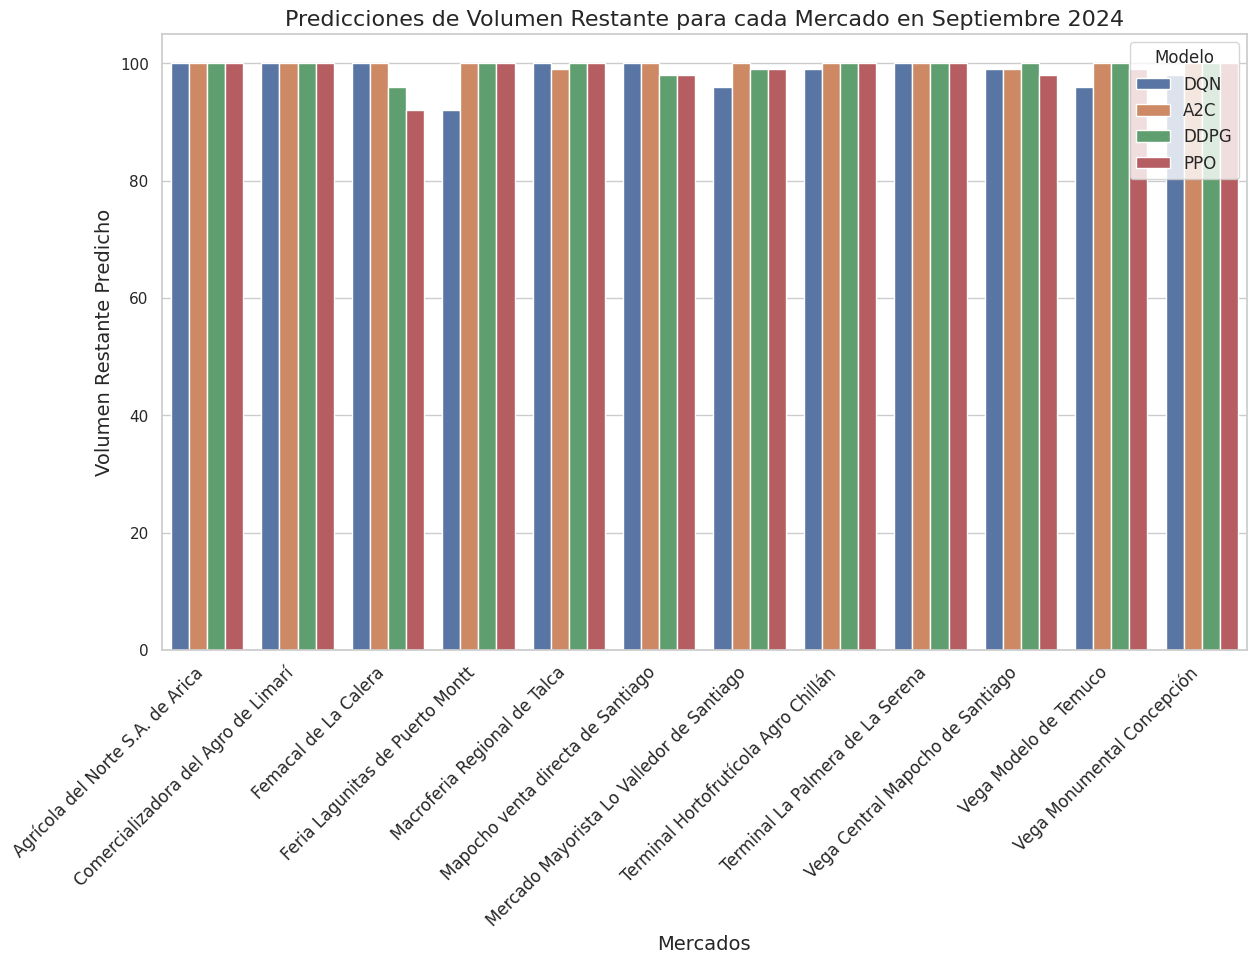

In [200]:
# Configurar el estilo de Seaborn para gráficos más estéticos
sns.set(style="whitegrid")

# Crear una figura de tamaño adecuado
plt.figure(figsize=(14, 8))

# Crear un gráfico de barras que muestre las predicciones por modelo para cada mercado
sns.barplot(x='Mercado', y='Volumen Restante', hue='Modelo', data=df_resultados)

# Añadir etiquetas y título
plt.xlabel('Mercados', fontsize=14)
plt.ylabel('Volumen Restante Predicho', fontsize=14)
plt.title('Predicciones de Volumen Restante para cada Mercado en Septiembre 2024', fontsize=16)

# Rotar las etiquetas del eje X para que sean legibles
plt.xticks(rotation=45, ha='right', fontsize=12)

# Mostrar la leyenda
plt.legend(title='Modelo', fontsize=12)

# Mostrar el gráfico
plt.show()


In [201]:
from google.colab import files
uploaded = files.upload()

Saving series-históricas-de-frutas-y-hortalizas_mensual_Todos_LosProductosv2.xlsx to series-históricas-de-frutas-y-hortalizas_mensual_Todos_LosProductosv2.xlsx


In [202]:
data_files = {}
for filename in uploaded.keys():
    data_files[filename] = pd.read_excel(filename)

In [203]:
# Example: Display the first few rows of one of the uploaded files
for key in data_files:
    print(f"Displaying data from {key}:")
    print(data_files[key].head())

Displaying data from series-históricas-de-frutas-y-hortalizas_mensual_Todos_LosProductosv2.xlsx:
     Fecha                           Mercado Producto  Variedad / Tipo  \
0  07/2021  Agrícola del Norte S.A. de Arica  Plátano  Sin especificar   
1  07/2021  Agrícola del Norte S.A. de Arica      Ajo            Chino   
2  07/2021  Agrícola del Norte S.A. de Arica     Piña         Caramelo   
3  07/2021  Agrícola del Norte S.A. de Arica     Piña         Caramelo   
4  07/2021  Agrícola del Norte S.A. de Arica     Piña         Caramelo   

    Calidad Procedencia  Volumen  Precio mínimo  Precio máximo  \
0    Pintón     Bolivia      150   12806.624340   13873.842992   
1   Primera       China      400   14941.061645   16008.280424   
2  Especial     Ecuador      400   19209.936509   21344.373815   
3   Primera     Ecuador      520   19209.936509   21344.373815   
4   Segunda     Ecuador      540   19209.936509   21344.373815   

   Precio promedio Unidad de comercialización  
0     13162.

In [206]:
# Assuming 'data_files' contains your uploaded Excel files
# Replace 'your_filename.xlsx' with the actual filename containing your product data
df_productos = data_files['series-históricas-de-frutas-y-hortalizas_mensual_Todos_LosProductosv2.xlsx']

# Now you can convert the date column
df_productos['Fecha'] = pd.to_datetime(df_productos['Fecha'])

<ipython-input-206-2b2213fb789a>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_productos['Fecha'] = pd.to_datetime(df_productos['Fecha'])


In [207]:
# Mostrar las primeras filas del DataFrame para verificar que los datos se cargaron correctamente
df_productos.head()

,Fecha,Mercado,Producto,Variedad / Tipo,Calidad,Procedencia,Volumen,Precio mínimo,Precio máximo,Precio promedio,Unidad de comercialización
0,2021-07-01,Agrícola del Norte S.A. de Arica,Plátano,Sin especificar,Pintón,Bolivia,150,12806.624340,13873.842992,13162.363848,$/caja 20 kilos
1,2021-07-01,Agrícola del Norte S.A. de Arica,Ajo,Chino,Primera,China,400,14941.061645,16008.280424,15474.671035,$/caja 10 kilos
2,2021-07-01,Agrícola del Norte S.A. de Arica,Piña,Caramelo,Especial,Ecuador,400,19209.936509,21344.373815,20277.155162,$/caja 10 unidades
3,2021-07-01,Agrícola del Norte S.A. de Arica,Piña,Caramelo,Primera,Ecuador,520,19209.936509,21344.373815,20256.631612,$/caja 12 unidades
4,2021-07-01,Agrícola del Norte S.A. de Arica,Piña,Caramelo,Segunda,Ecuador,540,19209.936509,21344.373815,20277.155162,$/caja 14 unidades


In [208]:
# Agrupar los datos por producto y mercado para calcular estadísticas
df_stats = df_productos.groupby(['Producto', 'Mercado']).agg({
    'Volumen': ['mean', 'std']
}).reset_index()

# Aplanar las columnas multi-nivel para facilitar el acceso
df_stats.columns = ['Producto', 'Mercado', 'Volumen_Medio', 'Volumen_Std']

# Calcular el umbral de quiebre como una función de la desviación estándar (por ejemplo, 1 desviación estándar por debajo de la media)
df_stats['Umbral_Quiebre'] = df_stats['Volumen_Medio'] - df_stats['Volumen_Std']

# Mostrar el DataFrame con los umbrales calculados
print(df_stats)


             Producto                                    Mercado  \
0              Acelga           Agrícola del Norte S.A. de Arica   
1              Acelga                       Femacal de La Calera   
2              Acelga            Feria Lagunitas de Puerto Montt   
3              Acelga               Macroferia Regional de Talca   
4              Acelga  Mercado Mayorista Lo Valledor de Santiago   
..                ...                                        ...   
693  Zapallo italiano       Terminal Hortofrutícola Agro Chillán   
694  Zapallo italiano           Terminal La Palmera de La Serena   
695  Zapallo italiano           Vega Central Mapocho de Santiago   
696  Zapallo italiano                      Vega Modelo de Temuco   
697  Zapallo italiano                 Vega Monumental Concepción   

     Volumen_Medio  Volumen_Std  Umbral_Quiebre  
0       567.232143   315.410151      251.821992  
1      3739.500000  1814.359231     1925.140769  
2       718.958333   503.440248  

In [209]:
# Fusionar los umbrales calculados con el DataFrame original para evaluar si hay quiebres
df_merged = pd.merge(df_productos, df_stats, on=['Producto', 'Mercado'])

# Identificar los casos donde el volumen actual está por debajo del umbral
df_quiebres = df_merged[df_merged['Volumen'] < df_merged['Umbral_Quiebre']]

# Mostrar los mercados en riesgo de quiebre
print(df_quiebres)


            Fecha                               Mercado  Producto  \
182    2021-09-01      Agrícola del Norte S.A. de Arica      Piña   
183    2021-09-01      Agrícola del Norte S.A. de Arica      Piña   
184    2021-09-01      Agrícola del Norte S.A. de Arica      Piña   
185    2021-09-01      Agrícola del Norte S.A. de Arica      Piña   
190    2021-11-01      Agrícola del Norte S.A. de Arica      Piña   
...           ...                                   ...       ...   
102750 2023-07-01  Terminal Hortofrutícola Agro Chillán    Pomelo   
102753 2023-09-01  Terminal Hortofrutícola Agro Chillán    Pomelo   
102754 2023-09-01  Terminal Hortofrutícola Agro Chillán    Pomelo   
102765 2024-06-01  Terminal Hortofrutícola Agro Chillán    Pomelo   
102784 2024-04-01     Mapocho venta directa de Santiago  Maracuyá   

        Variedad / Tipo   Calidad          Procedencia  Volumen  \
182            Caramelo  Especial              Ecuador      160   
183            Caramelo   Primera    

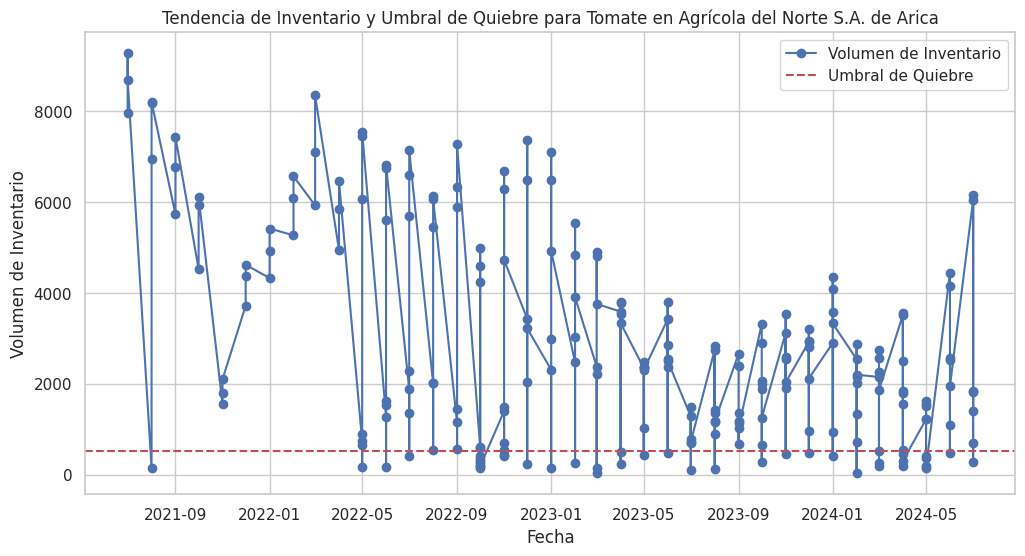

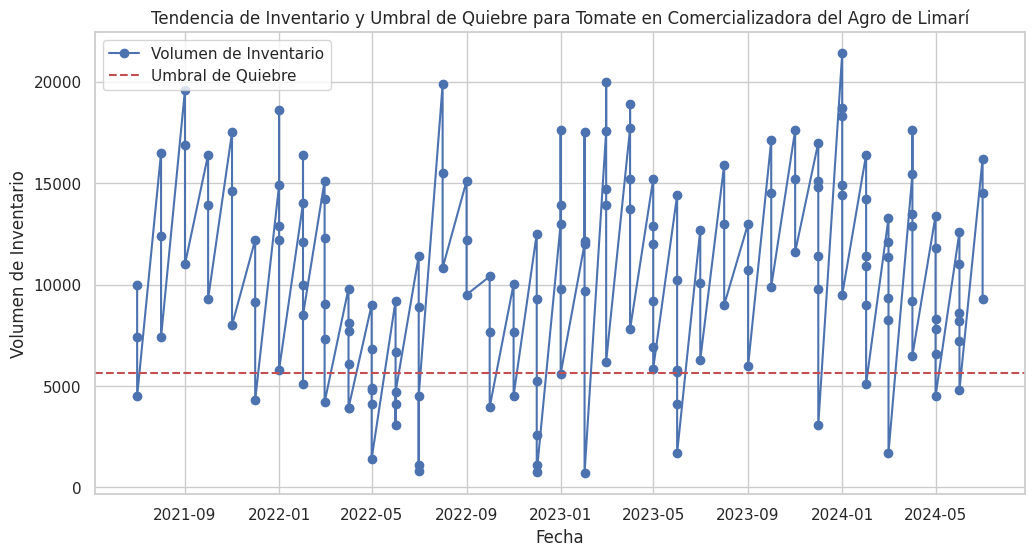

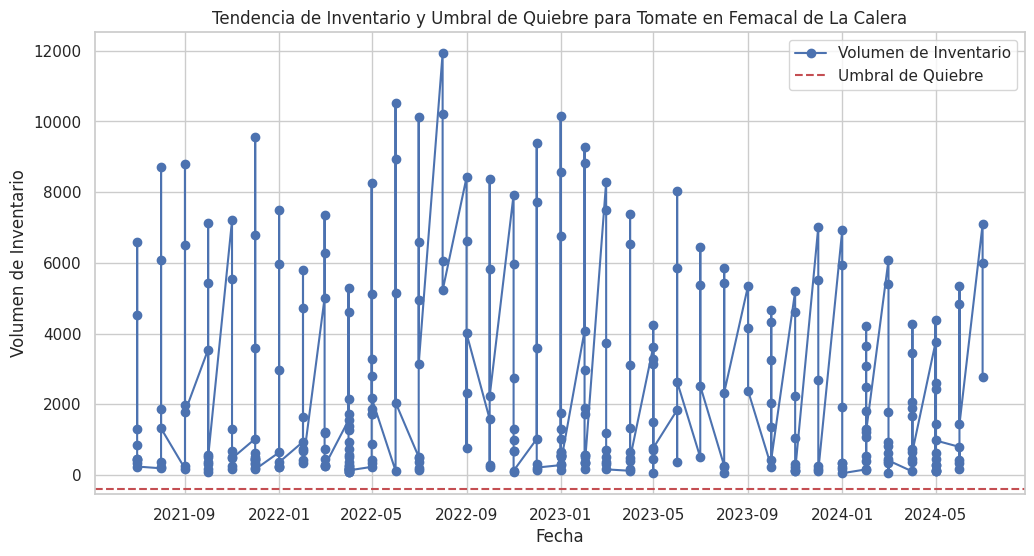

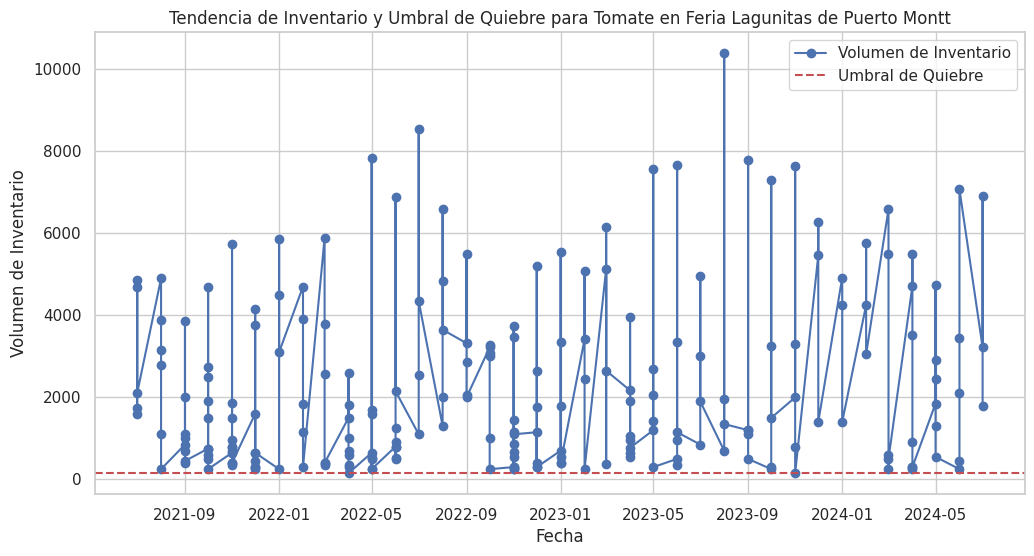

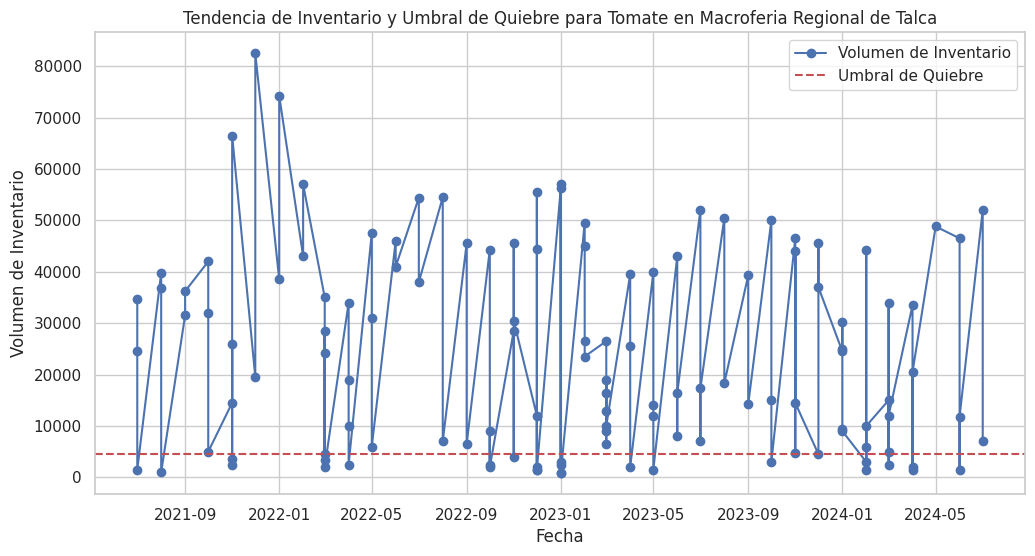

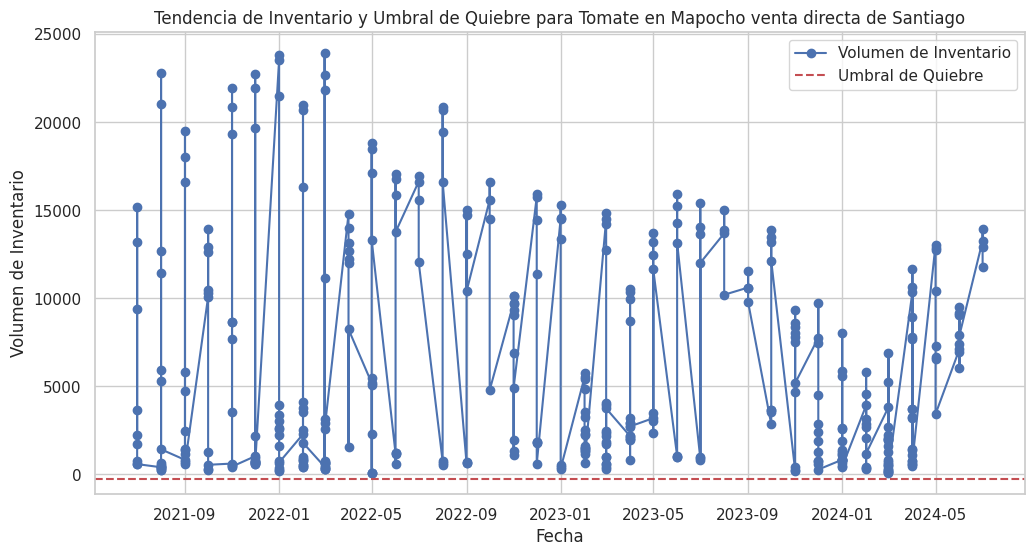

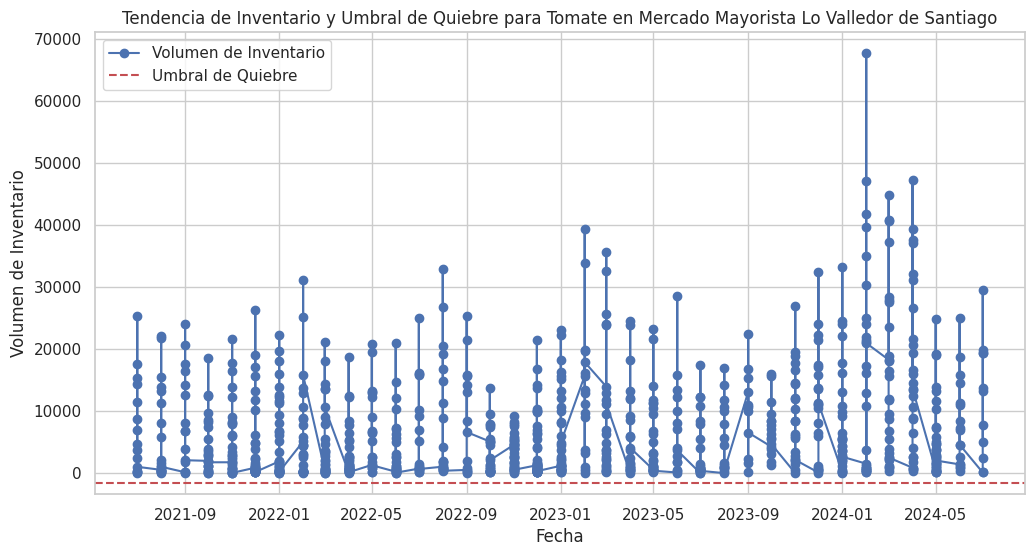

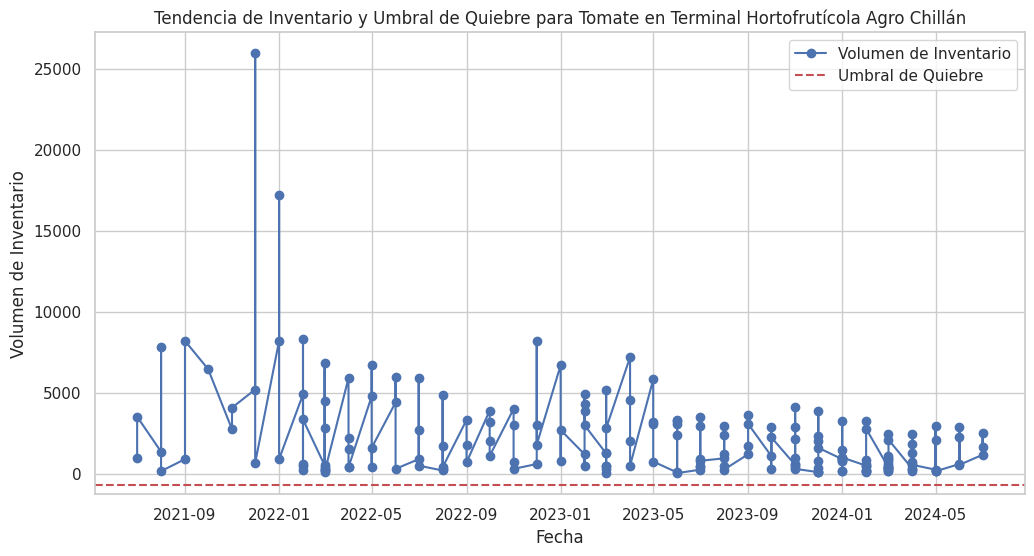

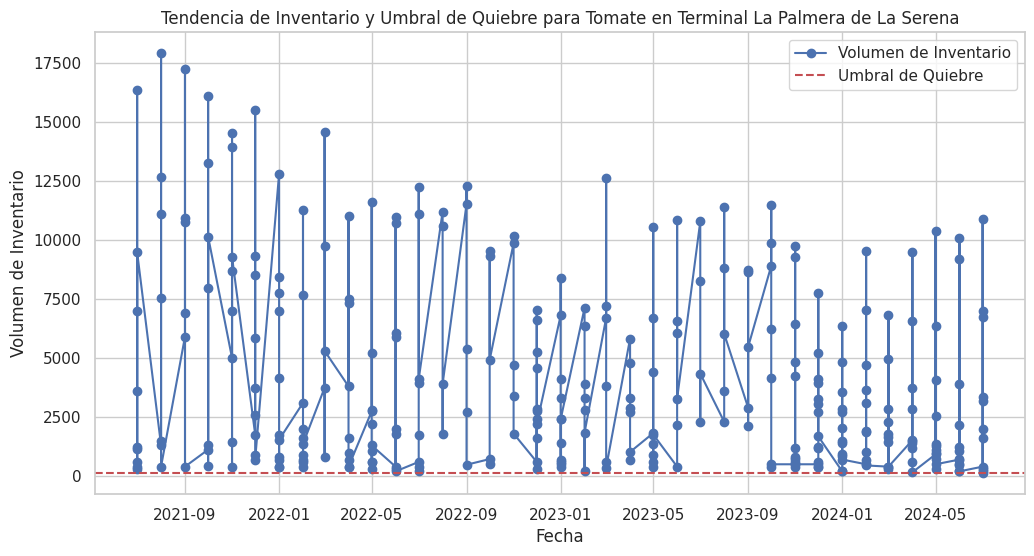

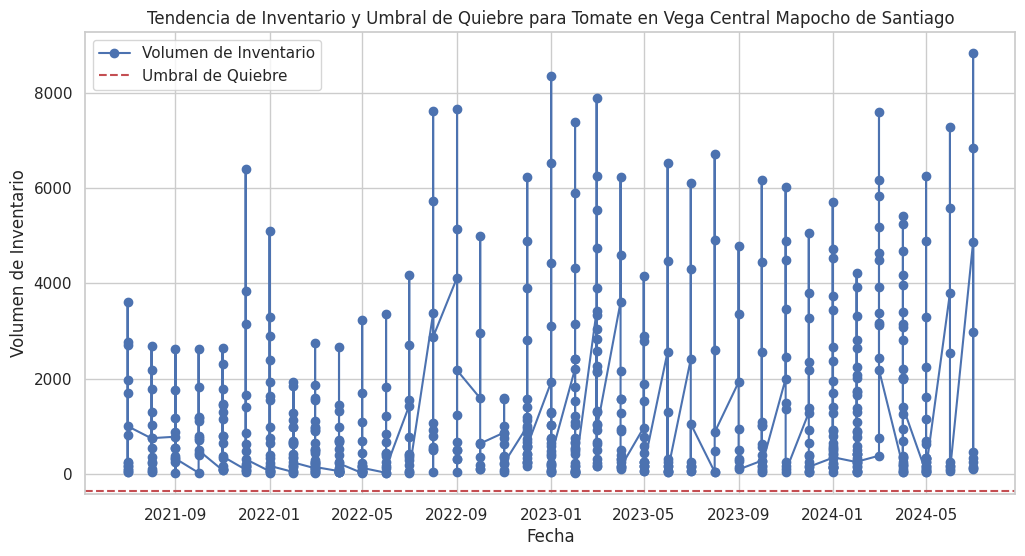

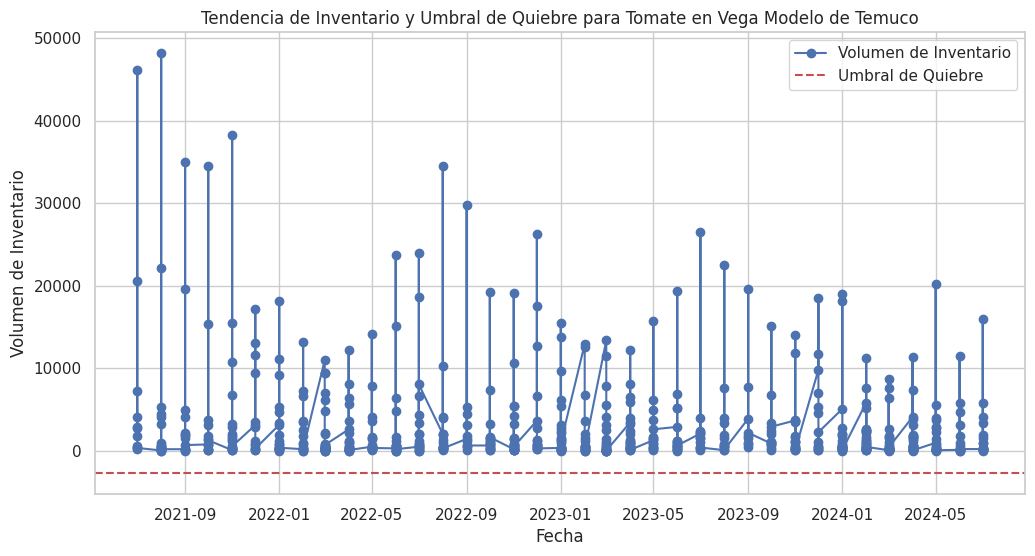

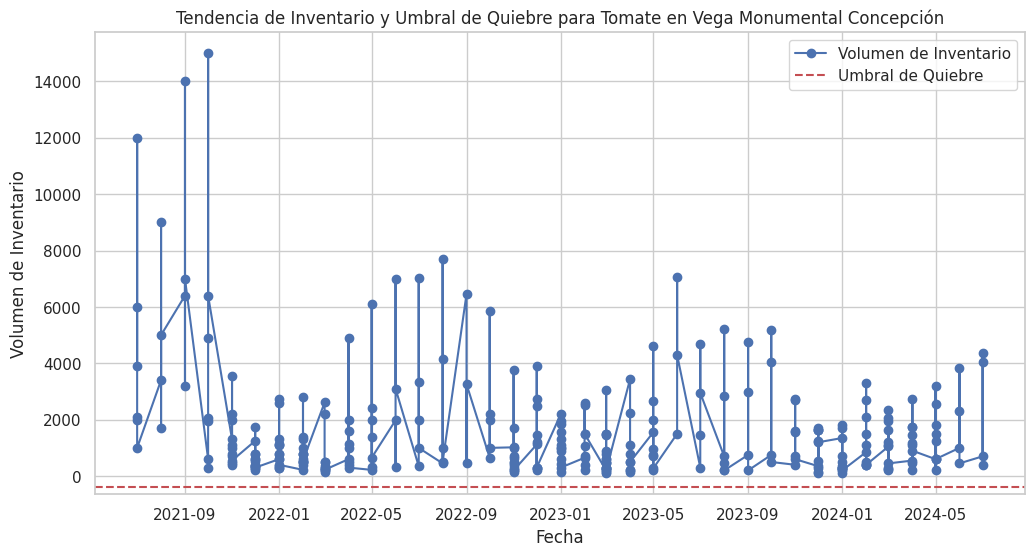

In [212]:
import matplotlib.pyplot as plt

# Seleccionar un producto y mercado específico para visualizar
producto = 'Tomate'  # Reemplaza con el producto que deseas analizar
mercados = [
    'Agrícola del Norte S.A. de Arica',
    'Comercializadora del Agro de Limarí',
    'Femacal de La Calera',
    'Feria Lagunitas de Puerto Montt',
    'Macroferia Regional de Talca',
    'Mapocho venta directa de Santiago',
    'Mercado Mayorista Lo Valledor de Santiago',
    'Terminal Hortofrutícola Agro Chillán',
    'Terminal La Palmera de La Serena',
    'Vega Central Mapocho de Santiago',
    'Vega Modelo de Temuco',
    'Vega Monumental Concepción']

# Filtrar los datos para el producto y mercados seleccionados
df_visualizacion = df_merged[(df_merged['Producto'] == producto) & (df_merged['Mercado'].isin(mercados))]

# Iterar sobre cada mercado para visualizar
for mercado in mercados:
    df_mercado = df_visualizacion[df_visualizacion['Mercado'] == mercado]
    if not df_mercado.empty:
        # Graficar la tendencia de inventario y el umbral de quiebre
        plt.figure(figsize=(12, 6))
        plt.plot(df_mercado['Fecha'], df_mercado['Volumen'], marker='o', linestyle='-', label='Volumen de Inventario')
        plt.axhline(y=df_mercado['Umbral_Quiebre'].iloc[0], color='r', linestyle='--', label='Umbral de Quiebre')
        plt.title(f'Tendencia de Inventario y Umbral de Quiebre para {producto} en {mercado}')
        plt.xlabel('Fecha')
        plt.ylabel('Volumen de Inventario')
        plt.legend()
        plt.grid(True)
        plt.show()

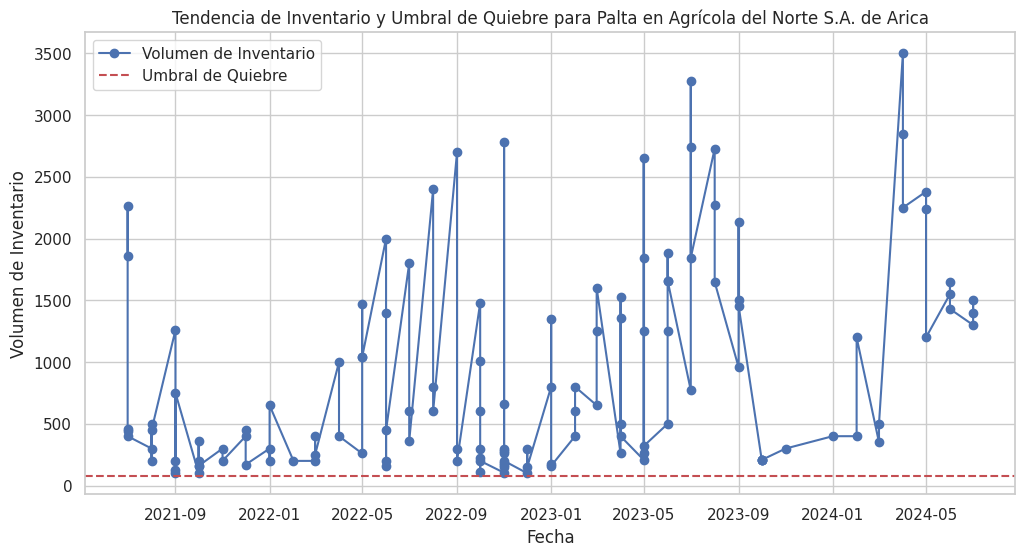

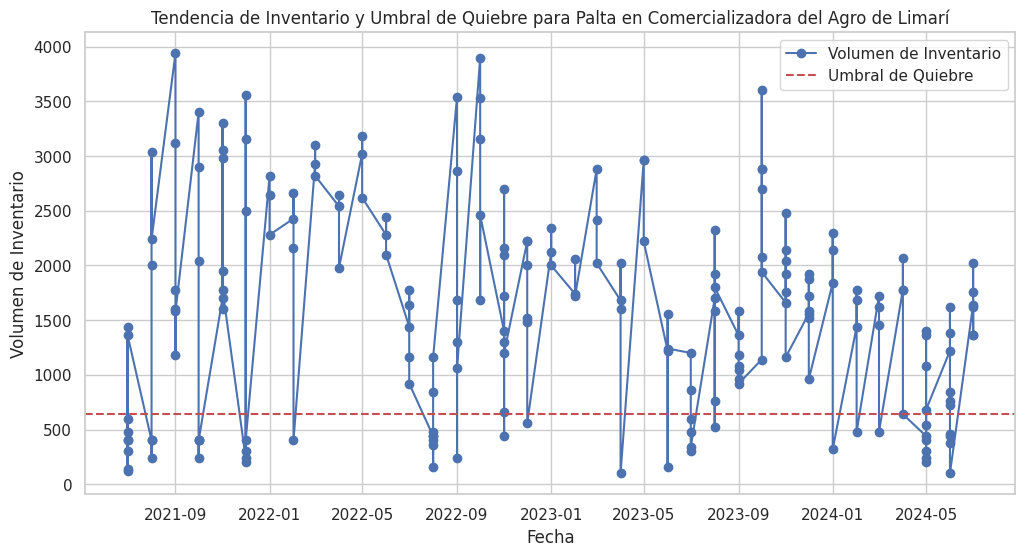

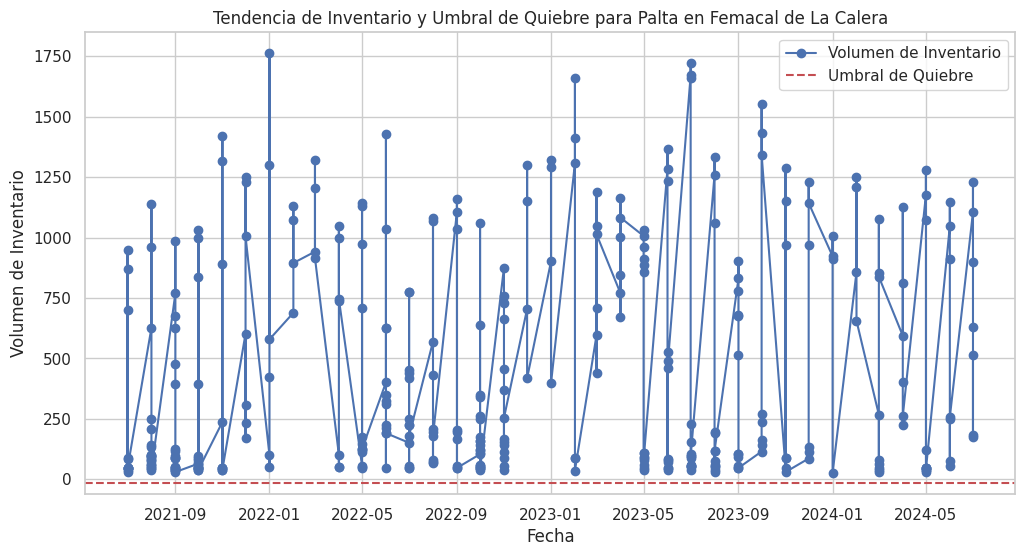

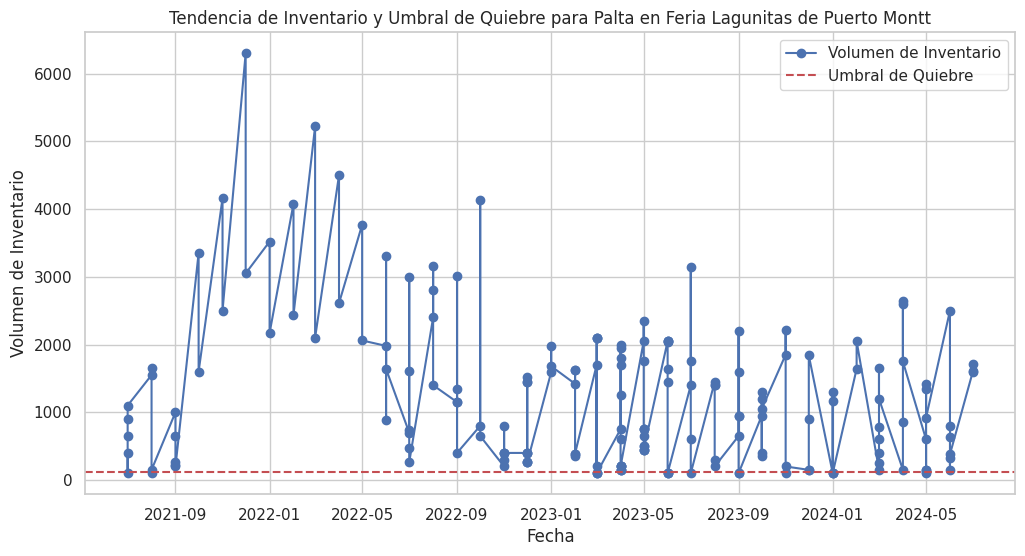

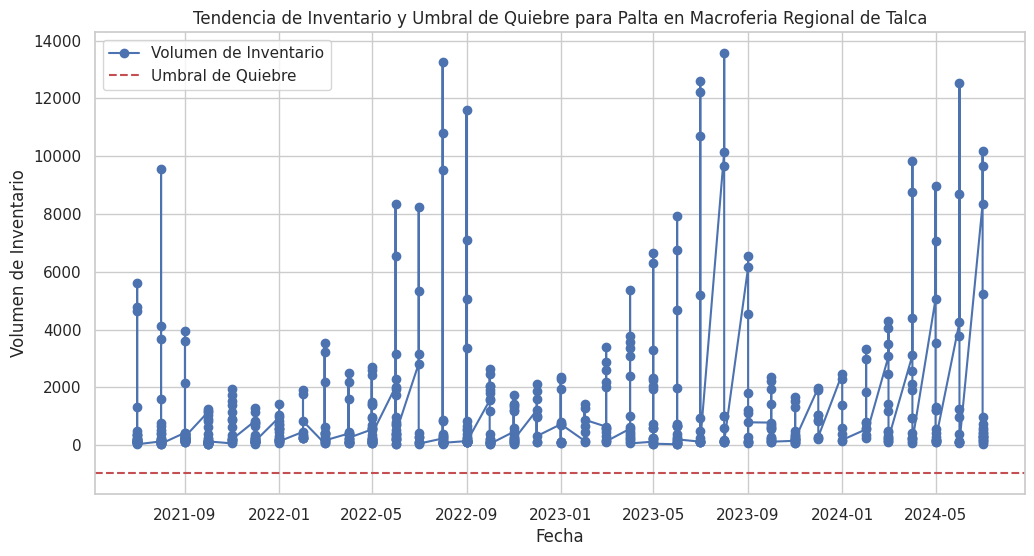

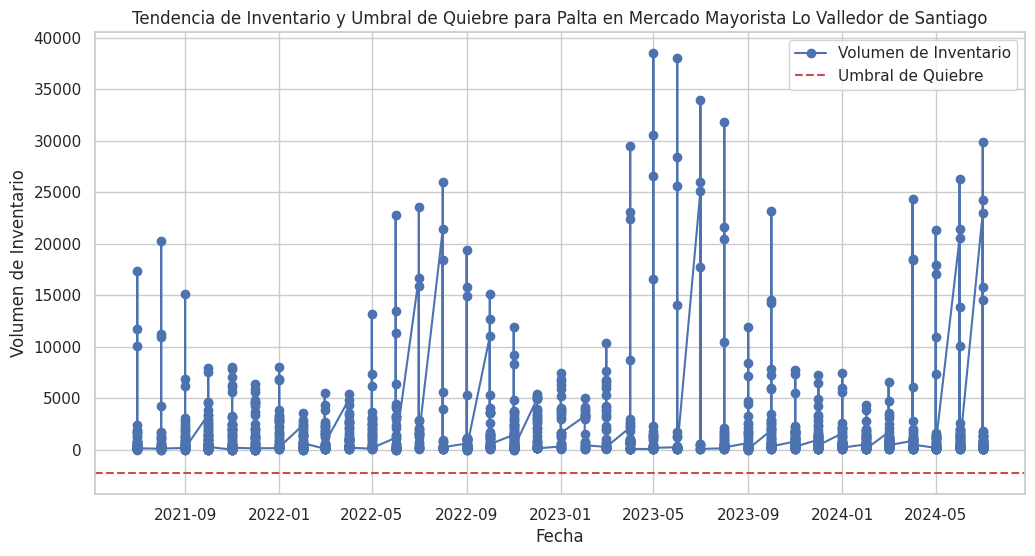

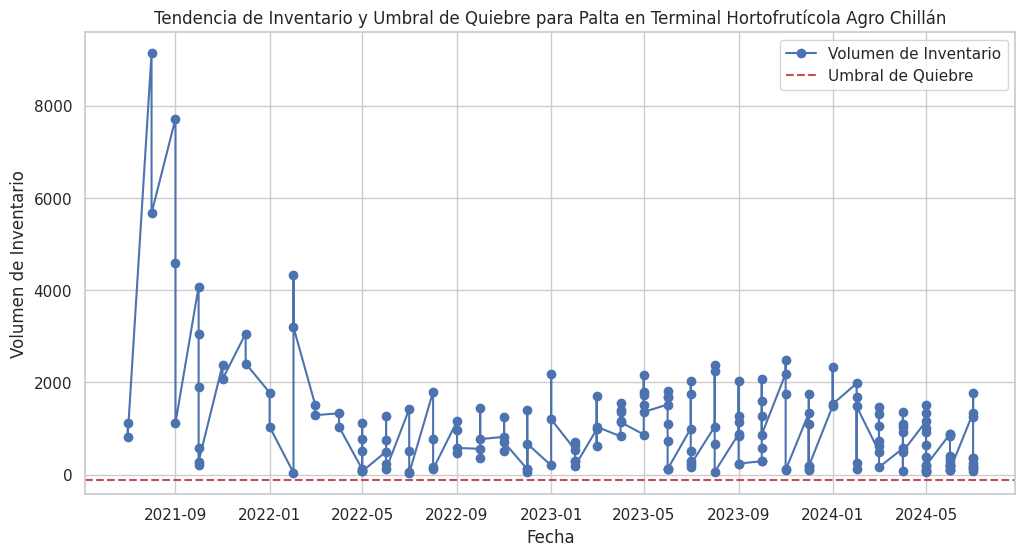

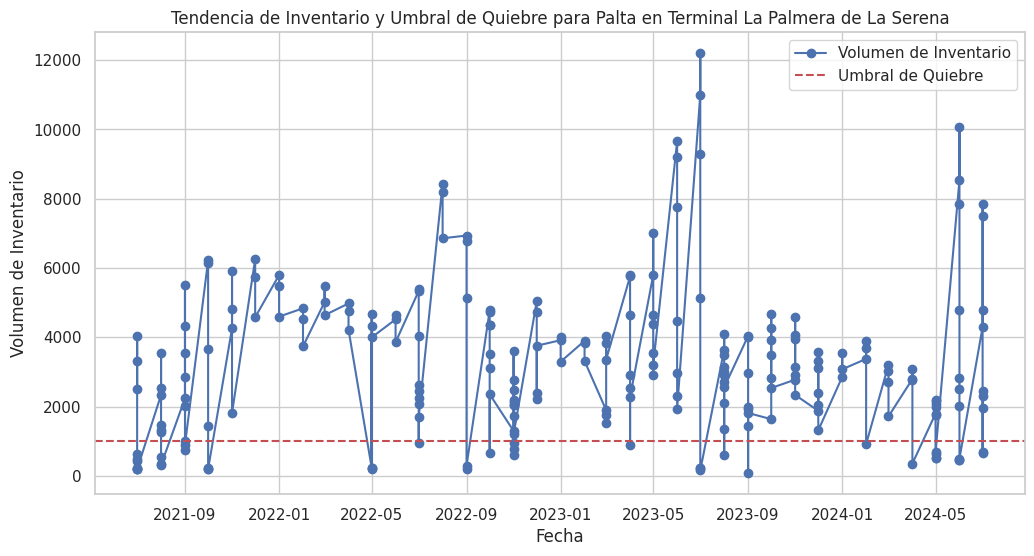

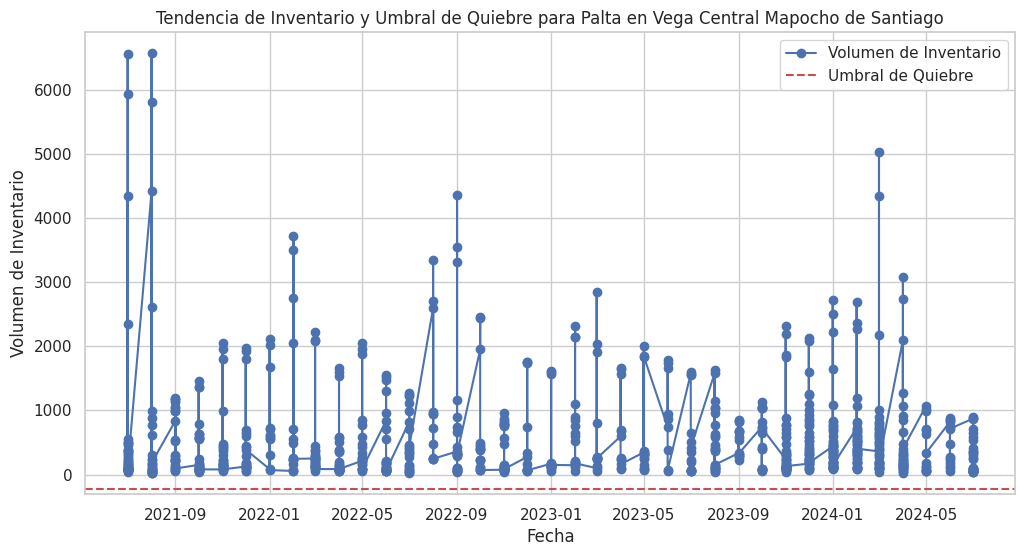

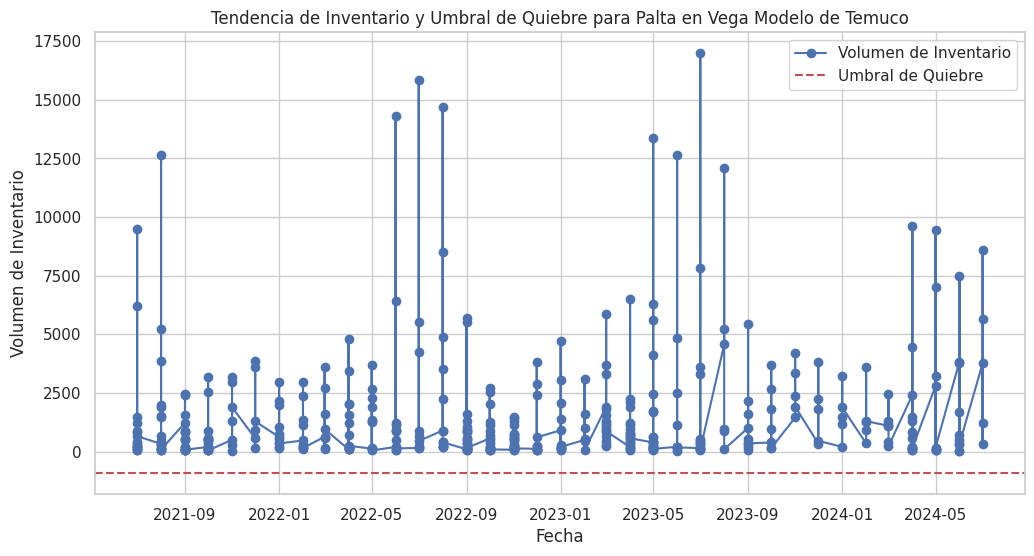

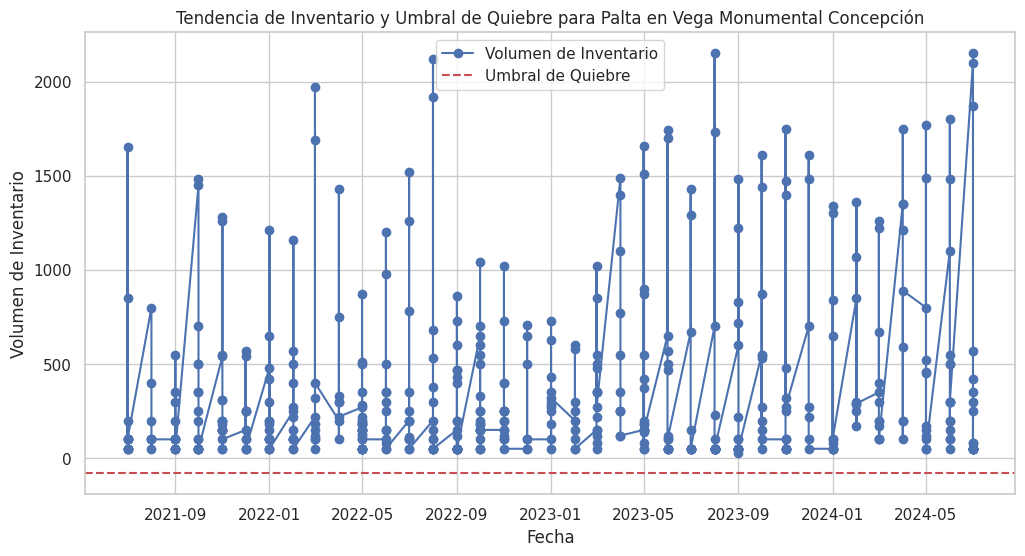

In [213]:
import matplotlib.pyplot as plt

# Seleccionar un producto y mercado específico para visualizar
producto = 'Palta'  # Reemplaza con el producto que deseas analizar
mercados = [
    'Agrícola del Norte S.A. de Arica',
    'Comercializadora del Agro de Limarí',
    'Femacal de La Calera',
    'Feria Lagunitas de Puerto Montt',
    'Macroferia Regional de Talca',
    'Mapocho venta directa de Santiago',
    'Mercado Mayorista Lo Valledor de Santiago',
    'Terminal Hortofrutícola Agro Chillán',
    'Terminal La Palmera de La Serena',
    'Vega Central Mapocho de Santiago',
    'Vega Modelo de Temuco',
    'Vega Monumental Concepción']

# Filtrar los datos para el producto y mercados seleccionados
df_visualizacion = df_merged[(df_merged['Producto'] == producto) & (df_merged['Mercado'].isin(mercados))]

# Iterar sobre cada mercado para visualizar
for mercado in mercados:
    df_mercado = df_visualizacion[df_visualizacion['Mercado'] == mercado]
    if not df_mercado.empty:
        # Graficar la tendencia de inventario y el umbral de quiebre
        plt.figure(figsize=(12, 6))
        plt.plot(df_mercado['Fecha'], df_mercado['Volumen'], marker='o', linestyle='-', label='Volumen de Inventario')
        plt.axhline(y=df_mercado['Umbral_Quiebre'].iloc[0], color='r', linestyle='--', label='Umbral de Quiebre')
        plt.title(f'Tendencia de Inventario y Umbral de Quiebre para {producto} en {mercado}')
        plt.xlabel('Fecha')
        plt.ylabel('Volumen de Inventario')
        plt.legend()
        plt.grid(True)
        plt.show()

In [218]:
import matplotlib.pyplot as plt

# Seleccionar un producto y mercado específico para visualizar
producto = 'Limon'  # Reemplaza con el producto que deseas analizar
mercados = [
    'Agrícola del Norte S.A. de Arica',
    'Comercializadora del Agro de Limarí',
    'Femacal de La Calera',
    'Feria Lagunitas de Puerto Montt',
    'Macroferia Regional de Talca',
    'Mapocho venta directa de Santiago',
    'Mercado Mayorista Lo Valledor de Santiago',
    'Terminal Hortofrutícola Agro Chillán',
    'Terminal La Palmera de La Serena',
    'Vega Central Mapocho de Santiago',
    'Vega Modelo de Temuco',
    'Vega Monumental Concepción']

# Filtrar los datos para el producto y mercados seleccionados
df_visualizacion = df_merged[(df_merged['Producto'] == producto) & (df_merged['Mercado'].isin(mercados))]

# Iterar sobre cada mercado para visualizar
for mercado in mercados:
    df_mercado = df_visualizacion[df_visualizacion['Mercado'] == mercado]
    if not df_mercado.empty:
        # Graficar la tendencia de inventario y el umbral de quiebre
        plt.figure(figsize=(12, 6))
        plt.plot(df_mercado['Fecha'], df_mercado['Volumen'], marker='o', linestyle='-', label='Volumen de Inventario')
        plt.axhline(y=df_mercado['Umbral_Quiebre'].iloc[0], color='r', linestyle='--', label='Umbral de Quiebre')
        plt.title(f'Tendencia de Inventario y Umbral de Quiebre para {producto} en {mercado}')
        plt.xlabel('Fecha')
        plt.ylabel('Volumen de Inventario')
        plt.legend()
        plt.grid(True)
        plt.show()

In [219]:
#Paso 5: Guardar y Compartir los Resultados
#Guardar los modelos entrenados:

#Puedes guardar los modelos entrenados en Google Drive para usarlos posteriormente:
dqn_model.save("/content/dqn_inventory_model")
a2c_model.save("/content/a2c_inventory_model")
ddpg_model.save("/content/ddpg_inventory_model")
ppo_model.save("/content/ppo_inventory_model")

In [227]:
# Step 2: Uploading the documents
from google.colab import files
uploaded = files.upload()

Saving series-históricas-de-frutas-y-hortalizas_mensual_Todos_LosProductosv2.xlsx to series-históricas-de-frutas-y-hortalizas_mensual_Todos_LosProductosv2 (1).xlsx


In [228]:
# Step 3: Loading the data
# Assuming that the uploaded files are in Excel format
data_files = {}
for filename in uploaded.keys():
    data_files[filename] = pd.read_excel(filename)

In [230]:
 #Example: Display the first few rows of one of the uploaded files
for key in data_files:
    print(f"Displaying data from {key}:")
    print(data_files[key].head())

Displaying data from series-históricas-de-frutas-y-hortalizas_mensual_Todos_LosProductosv2 (1).xlsx:
     Fecha                           Mercado Producto  Variedad / Tipo  \
0  07/2021  Agrícola del Norte S.A. de Arica  Plátano  Sin especificar   
1  07/2021  Agrícola del Norte S.A. de Arica      Ajo            Chino   
2  07/2021  Agrícola del Norte S.A. de Arica     Piña         Caramelo   
3  07/2021  Agrícola del Norte S.A. de Arica     Piña         Caramelo   
4  07/2021  Agrícola del Norte S.A. de Arica     Piña         Caramelo   

    Calidad Procedencia  Volumen  Precio mínimo  Precio máximo  \
0    Pintón     Bolivia      150   12806.624340   13873.842992   
1   Primera       China      400   14941.061645   16008.280424   
2  Especial     Ecuador      400   19209.936509   21344.373815   
3   Primera     Ecuador      520   19209.936509   21344.373815   
4   Segunda     Ecuador      540   19209.936509   21344.373815   

   Precio promedio Unidad de comercialización  
0     13

In [242]:
import pandas as pd

# Load the Excel file - ADJUST THIS PATH TO THE CORRECT LOCATION OF YOUR FILE
file_path = 'series-históricas-de-frutas-y-hortalizas_mensual_Todos_LosProductosv2.xlsx'  # Update with the correct path
df_data = pd.read_excel(file_path, sheet_name=None)  # Load all sheets

# Assuming the data is in a specific sheet, e.g., 'Sheet1'
sheet_name = 'series-historicas'  # Replace with the correct sheet name
df_data = df_data[sheet_name] # Access the sheet using the string variable

# Preview the data
print(df_data.head())

     Fecha                           Mercado Producto  Variedad / Tipo  \
0  07/2021  Agrícola del Norte S.A. de Arica  Plátano  Sin especificar   
1  07/2021  Agrícola del Norte S.A. de Arica      Ajo            Chino   
2  07/2021  Agrícola del Norte S.A. de Arica     Piña         Caramelo   
3  07/2021  Agrícola del Norte S.A. de Arica     Piña         Caramelo   
4  07/2021  Agrícola del Norte S.A. de Arica     Piña         Caramelo   

    Calidad Procedencia  Volumen  Precio mínimo  Precio máximo  \
0    Pintón     Bolivia      150   12806.624340   13873.842992   
1   Primera       China      400   14941.061645   16008.280424   
2  Especial     Ecuador      400   19209.936509   21344.373815   
3   Primera     Ecuador      520   19209.936509   21344.373815   
4   Segunda     Ecuador      540   19209.936509   21344.373815   

   Precio promedio Unidad de comercialización  
0     13162.363848            $/caja 20 kilos  
1     15474.671035            $/caja 10 kilos  
2     20277.15

In [245]:
#Step 2.2: Define the Custom Gym Environment
#You need to define a custom Gym environment that will use the data you just loaded. This involves creating a Python class that inherits from gym.Env and setting up the observation and action spaces.

import gym
from gym import spaces
import numpy as np

class InventoryEnv(gym.Env):
    def __init__(self, data):
        super(InventoryEnv, self).__init__()

        # Store the data
        self.data = data

        # Define the action space and observation space
        # For simplicity, assume action space is discrete (e.g., ordering more stock or not)
        self.action_space = spaces.Discrete(2)  # Example: 0 = do nothing, 1 = order more stock

        # Define observation space (e.g., inventory level, demand)
        # Example: if your state is represented by inventory level and demand
        self.observation_space = spaces.Box(low=0, high=np.inf, shape=(2,), dtype=np.float32)

        # Initialize state variables (e.g., inventory level, demand, etc.)
        self.current_step = 0
        self.inventory_level = self.data['Volumen'].iloc[self.current_step]
        self.demand = self.data['Precio promedio'].iloc[self.current_step]  # Assuming there's a 'Demanda' column

    def reset(self):
        # Reset the environment to an initial state
        self.current_step = 0
        self.inventory_level = self.data['Volumen'].iloc[self.current_step]
        self.demand = self.data['Precio promedio'].iloc[self.current_step]  # Adjust based on your data

        # Return the initial observation
        return np.array([self.inventory_level, self.demand], dtype=np.float32)

    def step(self, action):
        # Apply the action (e.g., replenish stock or do nothing)
        if action == 1:
            self.inventory_level += 100  # Example action: order 100 units

        # Move to the next step
        self.current_step += 1

        # Check if we've run out of steps
        done = self.current_step >= len(self.data)

        # Get the next state
        if not done:
            self.inventory_level -= self.demand  # Subtract demand from inventory
            self.demand = self.data['Precio promedio'].iloc[self.current_step]  # Update demand for next step

        # Calculate reward (e.g., minimize stockouts)
        if self.inventory_level < 0:
            reward = -10  # Penalty for stockout
        else:
            reward = 1  # Reward for meeting demand

        # Return observation, reward, done, and info
        obs = np.array([self.inventory_level, self.demand], dtype=np.float32)
        return obs, reward, done, {}

    def render(self, mode='human', close=False):
        # Optionally, implement this method to visualize the environment
        print(f"Step: {self.current_step}, Inventory Level: {self.inventory_level}, Precio promedio: {self.demand}")




In [246]:
#Step 2.3: Integrate the Environment with the Data
#Now that you have defined the environment, you can instantiate it using the loaded data:

# Initialize the environment with the loaded data
env = InventoryEnv(df_data)

# Reset the environment to start
initial_obs = env.reset()
print(f"Initial Observation: {initial_obs}")


Initial Observation: [  150.    13162.364]


In [247]:
obs = env.reset()

for _ in range(10):  # Example loop to simulate 10 steps
    action = env.action_space.sample()  # Random action for testing
    obs, reward, done, _ = env.step(action)
    env.render()
    if done:
        break


Step: 1, Inventory Level: -13012.36384810701, Precio promedio: 15474.67103463914
Step: 2, Inventory Level: -28387.03488274615, Precio promedio: 20277.155161975323
Step: 3, Inventory Level: -48564.19004472147, Precio promedio: 20256.63161156023
Step: 4, Inventory Level: -68720.82165628171, Precio promedio: 20277.155161975323
Step: 5, Inventory Level: -88897.97681825704, Precio promedio: 20277.155161975323
Step: 6, Inventory Level: -109175.13198023237, Precio promedio: 6936.92143259736
Step: 7, Inventory Level: -116012.05341282973, Precio promedio: 15799.476628701259
Step: 8, Inventory Level: -131811.530041531, Precio promedio: 28281.295374202295
Step: 9, Inventory Level: -159992.82541573327, Precio promedio: 4097.357347474423
Step: 10, Inventory Level: -163990.1827632077, Precio promedio: 3592.969544289029


In [248]:
# Save the trained models
dqn_model.save("/content/dqn_inventory_model")
a2c_model.save("/content/a2c_inventory_model")
ddpg_model.save("/content/ddpg_inventory_model")
ppo_model.save("/content/ppo_inventory_model")

In [249]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [250]:
import os

# List all files in the /content directory (or another directory if saved elsewhere)
saved_models = os.listdir('/content')

# Print out the list of saved models
print("Saved models:")
for model in saved_models:
    if 'inventory_model' in model:
        print(model)


Saved models:
ppo_inventory_model.zip
dqn_inventory_model.zip
a2c_inventory_model.zip
ddpg_inventory_model.zip
